# Linear Regression, NLP, Clustering, and Decision Tree Analysis using Cyber Security Data

### By Anoulom Phimphivong

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm

pd.set_option('display.max_columns',500)

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)



## Import Data from a Hard Drive

In [2]:
df_general_cyber = pd.read_csv('data\cybersecurity_attacks.csv', index_col=None, header=0)

df_webphish = pd.read_csv('data\web-page-phishing.csv', index_col=None, header=0)

df_emailphish= pd.read_csv('data\Phishing_Email.csv', index_col=None, header=0)

df_malware = pd.read_csv('data\CTU-IoT-Malware-Capture-3-1conn.log.labeled.csv',index_col=None, sep='|', header=0)

df_databreach = pd.read_csv('data\data_breach.csv', index_col=None, header=0)

df_cyber_salary = pd.read_csv('data\salaries_cyber.csv', index_col=None, header=0)

In [3]:
df_bruteforce = pd.read_csv(r'data\1000000-password-seclists.txt',delimiter = "\t")

## View Data

In [4]:
df_general_cyber.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

In [5]:
df_general_cyber.head(5)

Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data Malware Indicators  \
0  Qui natus odio asperiores nam. Optio nobis ius...       IoC Detected   
1  Aperiam quos modi officiis veritatis rem. Omni...       IoC Detected   
2  Perferendis sapiente vitae soluta. Hic delectu...       IoC Detected   
3  Totam maxime beatae expedita explicabo porro l...                NaN   
4  Odit nesciunt dolorem nisi iste iusto. Animi v...                NaN   

   Anomaly Scores  Alerts/Warnings Attack Type Attack Signature Action Taken  \
0           28.67              NaN     Malware  Known Pattern B       Logged   
1           51.50              NaN     Malware  Known Pattern A      Blocked   
2           87.42  Alert Triggered        DDoS  Known Pattern B      Ignored   
3           15.79  Alert Triggered     Malware  Known Pattern B      Blocked   
4            0.52  Alert Triggered        DDoS  Known Pattern B      Blocked   

  Severity Level User Information  \
0            Low    Reyansh Dugal   
1            Low       Sumer Rana   
2            Low     Himmat Karpe   
3         Medium       Fateh Kibe   
4            Low     Dhanush Chad   

                                  Device Information Network Segment  \
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment A   
1  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment B   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...       Segment C   
3  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...       Segment B   
4  Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...       Segment C   

    Geo-location Data Proxy Information Firewall Logs IDS/IPS Alerts  \
0  Jamshedpur, Sikkim      150.9.97.135      Log Data            NaN   
1  Bilaspur, Nagaland               NaN      Log Data            NaN   
2   Bokaro, Rajasthan    114.133.48.179      Log Data     Alert Data   
3  Jaunpur, Rajasthan               NaN           NaN     Alert Data   
4  Anantapur, Tripura     149.6.110.119           NaN     Alert Data   

  Log Source  
0     Server  
1   Firewall  
2   Firewall  
3   Firewall  
4   Firewall

In [6]:
df_webphish.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [7]:
df_webphish.head(5)

url_length  n_dots  n_hypens  n_underline  n_slash  n_questionmark  \
0          37       3         0            0        0               0   
1          77       1         0            0        0               0   
2         126       4         1            2        0               1   
3          18       2         0            0        0               0   
4          55       2         2            0        0               0   

   n_equal  n_at  n_and  n_exclamation  n_space  n_tilde  n_comma  n_plus  \
0        0     0      0              0        0        0        0       0   
1        0     0      0              0        0        0        0       0   
2        3     0      2              0        0        0        0       0   
3        0     0      0              0        0        0        0       0   
4        0     0      0              0        0        0        0       0   

   n_asterisk  n_hastag  n_dollar  n_percent  n_redirection  phishing  
0           0         0         0          0              0         0  
1           0         0         0          0              1         1  
2           0         0         0          0              1         1  
3           0         0         0          0              1         0  
4           0         0         0          0              1         0

In [8]:
df_emailphish.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [9]:
df_emailphish.head(5)

Unnamed: 0                                         Email Text  \
0           0  re : 6 . 1100 , disc : uniformitarianism , re ...   
1           1  the other side of * galicismos * * galicismo *...   
2           2  re : equistar deal tickets are you still avail...   
3           3  \nHello I am your hot lil horny toy.\n    I am...   
4           4  software at incredibly low prices ( 86 % lower...   

       Email Type  
0      Safe Email  
1      Safe Email  
2      Safe Email  
3  Phishing Email  
4  Phishing Email

In [10]:
df_malware.info(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156103 entries, 0 to 156102
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ts              156103 non-null  float64
 1   uid             156103 non-null  object 
 2   id.orig_h       156103 non-null  object 
 3   id.orig_p       156103 non-null  float64
 4   id.resp_h       156103 non-null  object 
 5   id.resp_p       156103 non-null  float64
 6   proto           156103 non-null  object 
 7   service         156103 non-null  object 
 8   duration        156103 non-null  object 
 9   orig_bytes      156103 non-null  object 
 10  resp_bytes      156103 non-null  object 
 11  conn_state      156103 non-null  object 
 12  local_orig      156103 non-null  object 
 13  local_resp      156103 non-null  object 
 14  missed_bytes    156103 non-null  float64
 15  history         156103 non-null  object 
 16  orig_pkts       156103 non-null  float64
 17  orig_ip_by

In [11]:
data_types = {
    'ts': 'float64',
    'uid': 'object',
    'id.orig_h': 'object',
    'id.orig_p': 'float64',
    'id.resp_h': 'object',
    'id.resp_p': 'float64',
    'proto': 'object',
    'service': 'object',
    'duration': 'object',
    'orig_bytes': 'object',
    'resp_bytes': 'object',
    'conn_state': 'object',
    'local_orig': 'object',
    'local_resp': 'object',
    'missed_bytes': 'float64',
    'history': 'object',
    'orig_pkts': 'float64',
    'orig_ip_bytes': 'float64',
    'resp_pkts': 'float64',
    'resp_ip_bytes': 'float64',
    'tunnel_parents': 'object',
    'label': 'object',
    'detailed-label': 'object'
}

# Extract column names with float datatype
float_columns = [col for col, dtype in data_types.items() if dtype == 'float64']

# Convert column names into a list format with single quotations and commas
float_columns_list = [f"'{col}'" for col in float_columns]

# Join the list elements into a single string
float_columns_string = ', '.join(float_columns_list)

print(float_columns_string)

'ts', 'id.orig_p', 'id.resp_p', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes'


In [12]:
df_malware.head(10)

ts                 uid    id.orig_h  id.orig_p       id.resp_h  \
0  1.526756e+09  C9YvmJ3zxtuqxWxLW5  192.168.2.5    38792.0  200.168.87.203   
1  1.526756e+09  CGsZqZ3UiQexLzPRVb  192.168.2.5    38792.0  200.168.87.203   
2  1.526756e+09  C0LkBW2VEa292Nvet8  192.168.2.5    38793.0  200.168.87.203   
3  1.526756e+09  CMDLrn2cVhrqvW8gKa  192.168.2.5    38793.0  200.168.87.203   
4  1.526756e+09  C2UM8f4knuL5Vnvp3h  192.168.2.5    38794.0  200.168.87.203   
5  1.526756e+09  CqARlF2BrZceWDkuq3  192.168.2.5    38794.0  200.168.87.203   
6  1.526756e+09  CxD6FF457MH87WA2Ce  192.168.2.5    38795.0  200.168.87.203   
7  1.526756e+09  CXm8KI3aKQABqZDcI4  192.168.2.5    38795.0  200.168.87.203   
8  1.526756e+09   CCvn4P1Z1MEiqTAP6  192.168.2.5    38796.0  200.168.87.203   
9  1.526756e+09  CXWZMM2K5lRQDNO2Dd  192.168.2.5    38796.0  200.168.87.203   

   id.resp_p proto service  duration orig_bytes resp_bytes conn_state  \
0    59353.0   tcp       -  2.998333          0          0         S0   
1    59353.0   tcp       -         -          -          -         S0   
2    59353.0   tcp       -  2.997182          0          0         S0   
3    59353.0   tcp       -         -          -          -         S0   
4    59353.0   tcp       -  2.996286          0          0         S0   
5    59353.0   tcp       -         -          -          -         S0   
6    59353.0   tcp       -  2.995263          0          0         S0   
7    59353.0   tcp       -         -          -          -         S0   
8    59353.0   tcp       -  2.999262          0          0         S0   
9    59353.0   tcp       -         -          -          -         S0   

  local_orig local_resp  missed_bytes history  orig_pkts  orig_ip_bytes  \
0          -          -           0.0       S        3.0          180.0   
1          -          -           0.0       S        1.0           60.0   
2          -          -           0.0       S        3.0          180.0   
3          -          -           0.0       S        1.0           60.0   
4          -          -           0.0       S        3.0          180.0   
5          -          -           0.0       S        1.0           60.0   
6          -          -           0.0       S        3.0          180.0   
7          -          -           0.0       S        1.0           60.0   
8          -          -           0.0       S        3.0          180.0   
9          -          -           0.0       S        1.0           60.0   

   resp_pkts  resp_ip_bytes tunnel_parents      label  \
0        0.0            0.0              -  Malicious   
1        0.0            0.0              -  Malicious   
2        0.0            0.0              -  Malicious   
3        0.0            0.0              -  Malicious   
4        0.0            0.0              -  Malicious   
5        0.0            0.0              -  Malicious   
6        0.0            0.0              -  Malicious   
7        0.0            0.0              -  Malicious   
8        0.0            0.0              -  Malicious   
9        0.0            0.0              -  Malicious   

              detailed-label  
0  PartOfAHorizontalPortScan  
1  PartOfAHorizontalPortScan  
2  PartOfAHorizontalPortScan  
3  PartOfAHorizontalPortScan  
4  PartOfAHorizontalPortScan  
5  PartOfAHorizontalPortScan  
6  PartOfAHorizontalPortScan  
7  PartOfAHorizontalPortScan  
8  PartOfAHorizontalPortScan  
9  PartOfAHorizontalPortScan

In [13]:
df_bruteforce.sample(30)

123456
788204    zFrn0n4ZhYC6k
937603        whatok190
34260            230380
490245          maxpicc
522979            JUICE
317577           dexies
637218          arashi1
626603         beaver01
243058           190605
529740         jbmanley
789265         zeugirdo
492899          MARINER
32007          leopoldo
56379              jdog
706534           262926
383881         vzr32sek
443236             rayn
855859          yamanin
489276    Md0a6osBYmIyI
6026             ghost1
133656         single12
432715         s2002s61
974261         vyt19ktn
15706          19071982
926591  winlky567fy47h6
526394          jkz1976
351922          281080n
693528         39691926
756170       zzzxxxwwwx
939440           Wh00mp

In [14]:
df_databreach.head(5)

Unnamed: 0                      Entity  Year    Records  Organization type  \
0           0       21st Century Oncology  2016    2200000         healthcare   
1           1                       500px  2020   14870304  social networking   
2           2       Accendo Insurance Co.  2020     175350         healthcare   
3           3  Adobe Systems Incorporated  2013  152000000               tech   
4           4                  Adobe Inc.  2019    7500000               tech   

          Method   Sources  
0         hacked    [5][6]  
1         hacked       [7]  
2  poor security    [8][9]  
3         hacked      [10]  
4  poor security  [11][12]

In [15]:
df_databreach.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         352 non-null    int64 
 1   Entity             352 non-null    object
 2   Year               352 non-null    object
 3   Records            350 non-null    object
 4   Organization type  352 non-null    object
 5   Method             351 non-null    object
 6   Sources            350 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.4+ KB


In [16]:
df_cyber_salary.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           1247 non-null   int64 
 1   experience_level    1247 non-null   object
 2   employment_type     1247 non-null   object
 3   job_title           1247 non-null   object
 4   salary              1247 non-null   int64 
 5   salary_currency     1247 non-null   object
 6   salary_in_usd       1247 non-null   int64 
 7   employee_residence  1247 non-null   object
 8   remote_ratio        1247 non-null   int64 
 9   company_location    1247 non-null   object
 10  company_size        1247 non-null   object
dtypes: int64(4), object(7)
memory usage: 107.3+ KB


In [17]:
df_cyber_salary.head(5)

work_year experience_level employment_type               job_title  salary  \
0       2022               EN              FT   Cyber Program Manager   63000   
1       2022               MI              FT        Security Analyst   95000   
2       2022               MI              FT        Security Analyst   70000   
3       2022               MI              FT     IT Security Analyst  250000   
4       2022               EN              CT  Cyber Security Analyst  120000   

  salary_currency  salary_in_usd employee_residence  remote_ratio  \
0             USD          63000                 US            50   
1             USD          95000                 US             0   
2             USD          70000                 US             0   
3             BRL          48853                 BR            50   
4             USD         120000                 BW           100   

  company_location company_size  
0               US            S  
1               US            M  
2               US            M  
3               BR            L  
4               BW            S

## Cleaning Dataset

### Combining Datasets

In [18]:
df_phishing = pd.concat([df_webphish, df_emailphish], axis=1)

### Create New Feature Variables and Drop Columns

In [19]:
df_malware['Total Bytes']= (df_malware['resp_bytes'] + df_malware['orig_bytes'])

In [20]:
df_general_cyber=df_general_cyber.drop(columns=['Malware Indicators'])

### Combine values with different spellings

In [21]:
df_general_cyber['Action Taken']=df_general_cyber['Action Taken'].replace(['Logged'], ['Recorded'])

In [22]:
df_general_cyber=df_general_cyber.rename(columns={'Device Information':'User Agent String'})

### One-hot encoding  for Regression

In [23]:
dummies_lb=pd.get_dummies(df_malware['label'], drop_first = True, prefix='lb', dtype='int')
dummies_exp=pd.get_dummies(df_cyber_salary['experience_level'], drop_first = True, prefix='exp', dtype='int')
dummies_jt=pd.get_dummies(df_cyber_salary['job_title'], drop_first = True, prefix='jt', dtype='int')
dummies_cs=pd.get_dummies(df_cyber_salary['company_size'], drop_first = True, prefix='cs', dtype='int')
dummies_er=pd.get_dummies(df_cyber_salary['employee_residence'], drop_first = True, prefix='er', dtype='int')
dummies_cl=pd.get_dummies(df_cyber_salary['company_location'], drop_first = True, prefix='cl', dtype='int')
dummies_at=pd.get_dummies(df_general_cyber['Attack Type'], drop_first = True, prefix='at', dtype='int')
dummies_ls=pd.get_dummies(df_general_cyber['Log Source'], drop_first = True, prefix='ls', dtype='int')

In [24]:
df_malware=pd.concat([df_malware, dummies_lb], axis=1)
df_cyber_salary=pd.concat([df_cyber_salary,dummies_exp, dummies_jt, dummies_cs, dummies_er, dummies_cl], axis=1)
df_general_cyber=pd.concat([df_general_cyber,dummies_at, dummies_ls], axis=1)

In [25]:
columns_list_with_single_quotes = ', '.join([f"'{col}'" for col in dummies_exp.columns])

print(columns_list_with_single_quotes)

'exp_EX', 'exp_MI', 'exp_SE'


In [26]:
columns_list_with_single_quotes = ', '.join([f"'{col}'" for col in dummies_jt.columns])

print(columns_list_with_single_quotes)

'jt_Application Security Architect', 'jt_Application Security Engineer', 'jt_Application Security Specialist', 'jt_Azure Security Engineer', 'jt_Chief Information Security Officer', 'jt_Cloud Security Architect', 'jt_Cloud Security Engineer', 'jt_Cloud Security Engineering Manager', 'jt_Computer Forensic Software Engineer', 'jt_Concierge Security Engineer', 'jt_Corporate Infrastructure Security Engineer', 'jt_Corporate Security Engineer', 'jt_Cyber Program Manager', 'jt_Cyber Security Analyst', 'jt_Cyber Security Architect', 'jt_Cyber Security Consultant', 'jt_Cyber Security Engineer', 'jt_Cyber Security Researcher', 'jt_Cyber Security Specialist', 'jt_Cyber Security Training Specialist', 'jt_Cyber Threat Analyst', 'jt_Cyber Threat Intelligence Analyst', 'jt_Data Security Analyst', 'jt_Detection Engineer', 'jt_DevOps Security Engineer', 'jt_DevSecOps Engineer', 'jt_Digital Forensics Analyst', 'jt_Director of Information Security', 'jt_Enterprise Security Engineer', 'jt_Ethical Hacker',

In [27]:
columns_list_with_single_quotes = ', '.join([f"'{col}'" for col in dummies_cs.columns])

print(columns_list_with_single_quotes)

'cs_M', 'cs_S'


In [28]:
columns_list_with_single_quotes = ', '.join([f"'{col}'" for col in dummies_er.columns])

print(columns_list_with_single_quotes)

'er_AF', 'er_AR', 'er_AT', 'er_AU', 'er_AZ', 'er_BE', 'er_BG', 'er_BR', 'er_BW', 'er_CA', 'er_CH', 'er_CL', 'er_CR', 'er_CZ', 'er_DE', 'er_DK', 'er_DZ', 'er_EE', 'er_EG', 'er_ES', 'er_ET', 'er_FR', 'er_GB', 'er_GH', 'er_GR', 'er_HR', 'er_HU', 'er_ID', 'er_IE', 'er_IL', 'er_IN', 'er_IR', 'er_IT', 'er_JP', 'er_KE', 'er_KG', 'er_LT', 'er_LU', 'er_MX', 'er_NG', 'er_NL', 'er_NO', 'er_NZ', 'er_PK', 'er_PL', 'er_PT', 'er_RO', 'er_RU', 'er_SA', 'er_SE', 'er_SG', 'er_SI', 'er_TR', 'er_TW', 'er_US', 'er_VN', 'er_ZA'


In [29]:
columns_list_with_single_quotes = ', '.join([f"'{col}'" for col in dummies_cl.columns])

print(columns_list_with_single_quotes)

'cl_AF', 'cl_AQ', 'cl_AR', 'cl_AT', 'cl_AU', 'cl_AX', 'cl_AZ', 'cl_BE', 'cl_BR', 'cl_BW', 'cl_CA', 'cl_CH', 'cl_CL', 'cl_CZ', 'cl_DE', 'cl_DK', 'cl_DZ', 'cl_EE', 'cl_EG', 'cl_ES', 'cl_ET', 'cl_FR', 'cl_GB', 'cl_GR', 'cl_HR', 'cl_HU', 'cl_ID', 'cl_IE', 'cl_IL', 'cl_IN', 'cl_IT', 'cl_JP', 'cl_KE', 'cl_LU', 'cl_MX', 'cl_NL', 'cl_NO', 'cl_NZ', 'cl_PK', 'cl_PL', 'cl_PT', 'cl_RO', 'cl_RS', 'cl_RU', 'cl_SA', 'cl_SE', 'cl_SG', 'cl_SI', 'cl_TR', 'cl_TW', 'cl_UM', 'cl_US', 'cl_VN', 'cl_ZA'


In [30]:
df_cyber_salary

work_year experience_level employment_type  \
0          2022               EN              FT   
1          2022               MI              FT   
2          2022               MI              FT   
3          2022               MI              FT   
4          2022               EN              CT   
...         ...              ...             ...   
1242       2020               MI              FT   
1243       2021               SE              FT   
1244       2021               SE              FT   
1245       2021               MI              FT   
1246       2021               MI              FT   

                         job_title  salary salary_currency  salary_in_usd  \
0            Cyber Program Manager   63000             USD          63000   
1                 Security Analyst   95000             USD          95000   
2                 Security Analyst   70000             USD          70000   
3              IT Security Analyst  250000             BRL          48853   
4           Cyber Security Analyst  120000             USD         120000   
...                            ...     ...             ...            ...   
1242        Cyber Security Analyst  140000             AUD          96422   
1243  Information Security Manager   60000             GBP          82528   
1244  Penetration Testing Engineer  126000             USD         126000   
1245  Information Security Analyst   42000             GBP          57769   
1246   Threat Intelligence Analyst   66310             USD          66310   

     employee_residence  remote_ratio company_location company_size  exp_EX  \
0                    US            50               US            S       0   
1                    US             0               US            M       0   
2                    US             0               US            M       0   
3                    BR            50               BR            L       0   
4                    BW           100               BW            S       0   
...                 ...           ...              ...          ...     ...   
1242                 AU            50               AU            M       0   
1243                 GB            50               GB            L       0   
1244                 US           100               US            L       0   
1245                 GB           100               GB            L       0   
1246                 US             0               US            L       0   

      exp_MI  exp_SE  jt_Application Security Architect  \
0          0       0                                  0   
1          1       0                                  0   
2          1       0                                  0   
3          1       0                                  0   
4          0       0                                  0   
...      ...     ...                                ...   
1242       1       0                                  0   
1243       0       1                                  0   
1244       0       1                                  0   
1245       1       0                                  0   
1246       1       0                                  0   

      jt_Application Security Engineer  jt_Application Security Specialist  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   
...                                ...                                 ...   
1242                                 0                                   0   
1243                                 0                                   0   
1244                                 0                                   0   
1245              

## Create the Dataset for EDA

In [31]:
df_general_cyber['Attack Type'].value_counts()

DDoS         13428
Malware      13307
Intrusion    13265
Name: Attack Type, dtype: int64

In [32]:
df_general_cyber['Anomaly Scores'].value_counts().head(15)


28.67    12
57.18    12
93.76    12
15.39    12
77.12    12
56.92    12
96.05    11
68.37    11
87.88    11
46.96    11
44.45    11
45.28    11
19.85    11
49.74    11
35.59    11
Name: Anomaly Scores, dtype: int64

In [33]:
df_general_cyber['Action Taken'].value_counts()


Blocked     13529
Ignored     13276
Recorded    13195
Name: Action Taken, dtype: int64

In [34]:
df_general_cyber['Attack Signature'].value_counts()

Known Pattern A    20076
Known Pattern B    19924
Name: Attack Signature, dtype: int64

In [35]:
df_general_cyber['User Agent String'].value_counts().head(20)

Mozilla/5.0 (compatible; MSIE 6.0; Windows NT 6.2; Trident/3.0)     35
Mozilla/5.0 (compatible; MSIE 5.0; Windows 98; Trident/4.1)         34
Mozilla/5.0 (compatible; MSIE 6.0; Windows CE; Trident/4.0)         33
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.0; Trident/3.0)     31
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 5.2; Trident/4.1)     31
Mozilla/5.0 (compatible; MSIE 8.0; Windows CE; Trident/3.0)         30
Mozilla/5.0 (compatible; MSIE 7.0; Windows 98; Trident/3.1)         30
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/3.1)     30
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 10.0; Trident/4.0)    30
Mozilla/5.0 (compatible; MSIE 8.0; Windows NT 6.1; Trident/4.0)     30
Mozilla/5.0 (compatible; MSIE 8.0; Windows 95; Trident/4.0)         29
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 5.2; Trident/5.1)     29
Mozilla/5.0 (compatible; MSIE 5.0; Windows NT 6.0; Trident/5.0)     29
Mozilla/5.0 (compatible; MSIE 7.0; Windows NT 6.1; Trident/4.0)     29
Mozill

In [36]:
df_general_cyber['Geo-location Data'].value_counts().head(20)

Ghaziabad, Meghalaya                       16
Kalyan-Dombivli, Jharkhand                 15
Ghaziabad, Uttarakhand                     14
Ghaziabad, Tripura                         14
Kottayam, Nagaland                         13
Srikakulam, Uttarakhand                    13
Aurangabad, Nagaland                       13
Yamunanagar, Arunachal Pradesh             13
Motihari, Odisha                           13
Amroha, Sikkim                             13
Ghaziabad, Jharkhand                       13
Imphal, Assam                              12
Aurangabad, Odisha                         12
Ghaziabad, Odisha                          12
Kanpur, Goa                                12
Rampur, Gujarat                            12
Ghaziabad, Nagaland                        12
Ichalkaranji, Sikkim                       12
Raurkela Industrial Township, Jharkhand    12
Jalna, Andhra Pradesh                      12
Name: Geo-location Data, dtype: int64

In [37]:
df_general_cyber['Log Source'].value_counts()

Firewall    20116
Server      19884
Name: Log Source, dtype: int64

In [38]:
df_general_cyber['Destination Port'].value_counts().head(15)


34117    6
7508     6
30804    5
37248    5
57508    5
56672    5
38787    5
36756    5
25889    5
39887    5
10176    5
59207    5
15150    5
9565     5
6871     5
Name: Destination Port, dtype: int64

In [39]:
df_general_cyber['Traffic Type'].value_counts().head(15)




DNS     13376
HTTP    13360
FTP     13264
Name: Traffic Type, dtype: int64

In [40]:
df_phishing['url_length'].value_counts().head(15)

18    4663
19    4630
20    4466
17    4449
16    4226
21    3960
15    3782
22    3432
14    3429
23    3121
13    2762
24    2666
12    2653
25    2314
26    2104
Name: url_length, dtype: int64

In [41]:
df_phishing['n_dots'].value_counts().head(15)

2     59827
1     17187
3     15636
4      4545
5      1373
6       534
7       266
14      145
8       141
15       91
9        71
10       53
16       48
13       44
12       35
Name: n_dots, dtype: int64

In [42]:
df_topsal_exp= df_cyber_salary[['experience_level','salary_in_usd']]
df_topsal_exp

experience_level  salary_in_usd
0                  EN          63000
1                  MI          95000
2                  MI          70000
3                  MI          48853
4                  EN         120000
...               ...            ...
1242               MI          96422
1243               SE          82528
1244               SE         126000
1245               MI          57769
1246               MI          66310

[1247 rows x 2 columns]

In [43]:
df_topsal_exp_avg= df_topsal_exp.groupby('experience_level',dropna=False).agg('mean').reset_index()

In [44]:
df_topsal_exp_avg

experience_level  salary_in_usd
0               EN   63579.474419
1               EX  200706.082192
2               MI  103377.080097
3               SE  144560.239488

In [45]:
df_topsal_exp_avgsort=df_topsal_exp_avg.sort_values(['salary_in_usd'], ascending=False)
df_topsal_exp_avgsort

experience_level  salary_in_usd
1               EX  200706.082192
3               SE  144560.239488
2               MI  103377.080097
0               EN   63579.474419

In [46]:
df_topsal_jt= df_cyber_salary[['job_title','salary_in_usd']]
df_topsal_jt



job_title  salary_in_usd
0            Cyber Program Manager          63000
1                 Security Analyst          95000
2                 Security Analyst          70000
3              IT Security Analyst          48853
4           Cyber Security Analyst         120000
...                            ...            ...
1242        Cyber Security Analyst          96422
1243  Information Security Manager          82528
1244  Penetration Testing Engineer         126000
1245  Information Security Analyst          57769
1246   Threat Intelligence Analyst          66310

[1247 rows x 2 columns]

In [47]:
df_topsal_jt_avg= df_topsal_jt.groupby('job_title',dropna=False).agg('mean').reset_index()
df_topsal_jt_avg.head(15)

job_title  salary_in_usd
0                 Application Security Analyst  104805.250000
1               Application Security Architect  315000.000000
2                Application Security Engineer   94778.125000
3              Application Security Specialist   85000.000000
4                      Azure Security Engineer   65858.666667
5           Chief Information Security Officer  168054.807692
6                     Cloud Security Architect  144995.142857
7                      Cloud Security Engineer  106561.466667
8           Cloud Security Engineering Manager   57506.500000
9          Computer Forensic Software Engineer  122000.000000
10                 Concierge Security Engineer  131154.000000
11  Corporate Infrastructure Security Engineer  105070.000000
12                 Corporate Security Engineer  180000.000000
13                       Cyber Program Manager   63000.000000
14                      Cyber Security Analyst   79465.533835

In [48]:
df_topsal_jt_avgsort=df_topsal_jt_avg.sort_values(['salary_in_usd'], ascending=False)
df_botsal_jt_avgsort=df_topsal_jt_avg.sort_values(['salary_in_usd'], ascending=True)
df_topsal_jt_avgsort10=df_topsal_jt_avgsort.head(10)
df_botsal_jt_avgsort10=df_botsal_jt_avgsort.head(10)
df_topsal_jt_avgsort10

job_title  salary_in_usd
1            Application Security Architect  315000.000000
79                  Staff Security Engineer  295000.000000
83     Threat Intelligence Response Analyst  260000.000000
59  Principal Application Security Engineer  237000.000000
77               Software Security Engineer  235540.000000
44  Information Security Compliance Manager  230000.000000
24                       Detection Engineer  226310.266667
70      Security Incident Response Engineer  205666.666667
31             Head of Information Security  199388.833333
33                             IAM Engineer  198333.333333

In [49]:
df_botsal_jt_avgsort10

job_title  salary_in_usd
74          Security Operations Engineer   49728.500000
23                 Data Security Analyst   50000.000000
8     Cloud Security Engineering Manager   57506.500000
54             Network Security Engineer   59435.000000
81                   Threat Hunting Lead   61000.000000
51    Lead Application Security Engineer   62726.000000
13                 Cyber Program Manager   63000.000000
43  Information Security Compliance Lead   65475.000000
4                Azure Security Engineer   65858.666667
64                           SOC Analyst   68135.714286

In [50]:
df_databreach_topsector_method=df_databreach[['Organization type', 'Method']]
df_databreach_topsector_method

Organization type                  Method
0           healthcare                  hacked
1    social networking                  hacked
2           healthcare           poor security
3                 tech                  hacked
4                 tech           poor security
..                 ...                     ...
347     social network                  hacked
348          financial  accidentally published
349         healthcare           poor security
350            various           poor security
351             retail  accidentally published

[352 rows x 2 columns]

In [51]:
df_databreach_topsector_methodcount= df_databreach_topsector_method['Method'].value_counts()
df_databreach_topsector_methodcount

hacked                                                  192
poor security                                            43
lost / stolen media                                      33
accidentally published                                   21
inside job                                               19
lost / stolen computer                                   16
unknown                                                   7
improper setting, hacked                                  2
poor security/inside job                                  2
intentionally lost                                        1
accidentally exposed                                      1
publicly accessible Amazon Web Services (AWS) server      1
hacked/misconfiguration                                   1
rogue contractor                                          1
ransomware hacked                                         1
misconfiguration/poor security                            1
unprotected api                         

In [52]:
value_counts_series = df_databreach_topsector_method['Method'].value_counts()

In [53]:
value_counts_method = pd.DataFrame({'Method': value_counts_series.index, 'Count': value_counts_series.values})

In [54]:
value_counts_method10=value_counts_method.head(10)
value_counts_method10

Method  Count
0                    hacked    192
1             poor security     43
2       lost / stolen media     33
3    accidentally published     21
4                inside job     19
5    lost / stolen computer     16
6                   unknown      7
7  improper setting, hacked      2
8  poor security/inside job      2
9        intentionally lost      1

In [55]:
df_db_orgtype= df_databreach_topsector_method['Organization type'].value_counts()

df_db_orgtype.head(15)

web               53
healthcare        47
financial         38
government        30
retail            27
tech              19
academic          13
telecoms          12
gaming            12
social network     8
hotel              8
transport          7
military           7
energy             4
restaurant         3
Name: Organization type, dtype: int64

In [56]:
value_counts_series= df_databreach_topsector_method['Organization type'].value_counts()

In [57]:
value_counts_orgtype = pd.DataFrame({'Org Type': value_counts_series.index, 'Count': value_counts_series.values})
value_counts_orgtype15=value_counts_orgtype.head(15)
value_counts_orgtype15

Org Type  Count
0              web     53
1       healthcare     47
2        financial     38
3       government     30
4           retail     27
5             tech     19
6         academic     13
7         telecoms     12
8           gaming     12
9   social network      8
10           hotel      8
11       transport      7
12        military      7
13          energy      4
14      restaurant      3

In [58]:
 df_malware_malicious=df_malware[df_malware['label'].str.contains('Malicious')]
 df_malware_benign=df_malware[df_malware['label'].str.contains('Benign')]

In [59]:
df_malware_malicious

ts                 uid    id.orig_h  id.orig_p  \
0       1.526756e+09  C9YvmJ3zxtuqxWxLW5  192.168.2.5    38792.0   
1       1.526756e+09  CGsZqZ3UiQexLzPRVb  192.168.2.5    38792.0   
2       1.526756e+09  C0LkBW2VEa292Nvet8  192.168.2.5    38793.0   
3       1.526756e+09  CMDLrn2cVhrqvW8gKa  192.168.2.5    38793.0   
4       1.526756e+09  C2UM8f4knuL5Vnvp3h  192.168.2.5    38794.0   
...              ...                 ...          ...        ...   
156098  1.526886e+09  CzeVGM1n60FIryJyBi  192.168.2.5    36646.0   
156099  1.526886e+09   Cq9Oi6YyGNTJlf356  192.168.2.5    36647.0   
156100  1.526886e+09  Cc5Jwn4krKLqvFHdG1  192.168.2.5    36647.0   
156101  1.526886e+09  Ck8fNL3RpnSPu9Kn9e  192.168.2.5    36648.0   
156102  1.526793e+09  CY3eGl3hKYsrYxwFv6  192.168.2.5    41501.0   

             id.resp_h  id.resp_p proto service      duration orig_bytes  \
0       200.168.87.203    59353.0   tcp       -      2.998333          0   
1       200.168.87.203    59353.0   tcp       -             -          -   
2       200.168.87.203    59353.0   tcp       -      2.997182          0   
3       200.168.87.203    59353.0   tcp       -             -          -   
4       200.168.87.203    59353.0   tcp       -      2.996286          0   
...                ...        ...   ...     ...           ...        ...   
156098  200.168.87.203    59353.0   tcp       -             -          -   
156099  200.168.87.203    59353.0   tcp       -      2.996060          0   
156100  200.168.87.203    59353.0   tcp       -             -          -   
156101  200.168.87.203    59353.0   tcp       -      0.995112          0   
156102     54.39.23.28     2407.0   tcp     irc  93280.030966       6303   

       resp_bytes conn_state local_orig local_resp  missed_bytes history  \
0               0         S0          -          -           0.0       S   
1               -         S0          -          -           0.0       S   
2               0         S0          -          -           0.0       S   
3               -         S0          -          -           0.0       S   
4               0         S0          -          -           0.0       S   
...           ...        ...        ...        ...           ...     ...   
156098          -         S0          -          -           0.0       S   
156099          0         S0          -          -           0.0       S   
156100          -         S0          -          -           0.0       S   
156101          0         S0          -          -           0.0       S   
156102       9069         S1          -          -           0.0  ShADad   

        orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes tunnel_parents  \
0             3.0          180.0        0.0            0.0              -   
1             1.0           60.0        0.0            0.0              -   
2             3.0          180.0        0.0            0.0              -   
3             1.0           60.0        0.0            0.0              -   
4             3.0          180.0        0.0            0.0              -   
...           ...            ...        ...            ...            ...   
156098        1.0           60.0        0.0            0.0              -   
156099        3.0          180.0        0.0            0.0              -   
156100        1.0           60.0        0.0            0.0              -   
156101        2.0          120.0        0.0            0.0              -   
156102     3031.0       164117.0     5975.0       289732.0              -   

            label             detailed-label Total Bytes  lb_Malicious  
0       Malicious  PartOfAHorizontalPortScan          00             1  
1       Malicious  PartOfAHorizontalPortScan          --             1  
2       Malicious  PartOfAHorizontalPortScan          00             1  
3       Malicious  PartOfAHorizontalPortScan          --             1  
4       Malicious  PartOfAHorizontalPortScan          00             1  
...         

In [60]:
 df_malware_benign

ts                 uid    id.orig_h  id.orig_p  \
13      1.526756e+09  CuOSYz3QNAKPuLEOXg  192.168.2.5      123.0   
14      1.526756e+09   Cr32XW1idd6BFFTCq  192.168.2.5      123.0   
15      1.526756e+09  CKgbVy3cictQOsYd35  192.168.2.5      123.0   
22      1.526756e+09  CNchMr17HHBrWbVOp4  192.168.2.5      123.0   
29      1.526756e+09  Cid37b1b4SfLVyu7O3  192.168.2.5      123.0   
...              ...                 ...          ...        ...   
155873  1.526881e+09  CMDolc3TMgO7ALIoJa  192.168.2.5    54390.0   
155932  1.526885e+09    C1eHS8e5BLwke5s2  192.168.2.5      123.0   
155994  1.526886e+09   CxNGrF1tcThfo73u7  192.168.2.5      123.0   
156022  1.526886e+09  CWqBb840Zd3NFDQcx3  192.168.2.5      123.0   
156033  1.526886e+09  CdOXIM2fqGf3MIcl7i  192.168.2.5      123.0   

             id.resp_h  id.resp_p proto service    duration orig_bytes  \
13      78.108.102.237      123.0   udp       -    0.012703         48   
14      37.157.198.150      123.0   udp       -   35.017664        288   
15         31.31.74.35      123.0   udp       -   38.017650        288   
22          5.1.56.123      123.0   udp       -   68.014546        336   
29         31.31.74.35      123.0   udp       -    0.017674         48   
...                ...        ...   ...     ...         ...        ...   
155873    137.32.88.31       22.0   tcp       -  106.938579         32   
155932  78.108.102.237      123.0   udp       -    0.014581         48   
155994      5.1.56.123      123.0   udp       -    0.103551         48   
156022  37.157.198.150      123.0   udp       -    0.014925         48   
156033     31.31.74.35      123.0   udp       -    0.110998         48   

       resp_bytes conn_state local_orig local_resp  missed_bytes history  \
13             48         SF          -          -           0.0      Dd   
14            288         SF          -          -           0.0      Dd   
15            288         SF          -          -           0.0      Dd   
22            336         SF          -          -           0.0      Dd   
29             48         SF          -          -           0.0      Dd   
...           ...        ...        ...        ...           ...     ...   
155873          0         S2          -          -           0.0   ShADF   
155932         48         SF          -          -           0.0      Dd   
155994         48         SF          -          -           0.0      Dd   
156022         48         SF          -          -           0.0      Dd   
156033         48         SF          -          -           0.0      Dd   

        orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes tunnel_parents  \
13            1.0           76.0        1.0           76.0              -   
14            6.0          456.0        6.0          456.0              -   
15            6.0          456.0        6.0          456.0              -   
22            7.0          532.0        7.0          532.0              -   
29            1.0           76.0        1.0           76.0              -   
...           ...            ...        ...            ...            ...   
155873       11.0          716.0        1.0           44.0              -   
155932        1.0           76.0        1.0           76.0              -   
155994        1.0           76.0        1.0           76.0              -   
156022        1.0           76.0        1.0           76.0              -   
156033        1.0           76.0        1.0           76.0              -   

         label detailed-label Total Bytes  lb_Malicious  
13      Benign              -        4848             0  
14      Benign              -      288288             0  
15      Benign              -      288288             0  
22      Benign              -      336336             0  
29      Benign              -        4848             0  
...        ...            ...         ...           ...  
155873  Benign              -         032             0  
155932  Be

In [61]:
df_malware_mal_destinip= df_malware_malicious['id.resp_h'].value_counts()
df_malware_mal_destinip

200.168.87.203     23295
148.251.4.51          77
182.253.179.62        76
203.242.197.223       76
144.76.156.49         76
                   ...  
203.93.92.186          1
69.137.122.227         1
204.45.11.62           1
144.204.142.215        1
204.17.42.74           1
Name: id.resp_h, Length: 61974, dtype: int64

In [62]:
df_malware_ben_destinip=  df_malware_benign['id.resp_h'].value_counts()
df_malware_ben_destinip

192.168.2.5        1216
78.108.102.237      185
37.157.198.150      183
31.31.74.35         183
5.1.56.123          183
                   ... 
182.86.50.248         1
182.36.241.16         1
182.145.111.246       1
182.172.13.72         1
137.32.88.31          1
Name: id.resp_h, Length: 2304, dtype: int64

In [63]:
df_malware_mal_ports= df_malware_malicious['id.resp_p'].value_counts()
df_malware_mal_ports

22.0       128264
59353.0     23295
2407.0          8
Name: id.resp_p, dtype: int64

In [64]:
df_malware_ben_ports= df_malware_benign['id.resp_p'].value_counts()
df_malware_ben_ports

22.0      2591
123.0      734
0.0        560
1.0        416
13.0       175
3.0         45
10.0        11
67.0         3
5353.0       1
Name: id.resp_p, dtype: int64

In [65]:
df_malware_mal_sourcetodestbyte= df_malware_malicious['orig_bytes'].value_counts()
df_malware_mal_sourcetodestbyte

-       72947
0       72700
589      5690
605        77
21         64
537        53
581         9
53          8
32          3
597         3
437         2
227         1
325         1
365         1
1641        1
349         1
576         1
92          1
701         1
60          1
521         1
6303        1
Name: orig_bytes, dtype: int64

In [66]:
df_malware_ben_sourcetodestbyte= df_malware_benign['orig_bytes'].value_counts()
df_malware_ben_sourcetodestbyte

0       2404
-        997
48       720
589      151
180      114
120       83
32        16
56        15
3          5
84         3
300        2
437        2
240        2
288        2
1560       2
196        1
1988       1
1308       1
1576       1
2509       1
3340       1
140        1
1744       1
605        1
1036       1
892        1
537        1
385        1
333        1
448        1
36         1
336        1
1004       1
Name: orig_bytes, dtype: int64

In [67]:
df_malware_mal_destotosourcebyte= df_malware_malicious['resp_bytes'].value_counts()
df_malware_mal_destotosourcebyte

-       72947
0       72698
1801     1449
2603      609
2241      402
        ...  
774         1
890         1
314         1
1581        1
9069        1
Name: resp_bytes, Length: 115, dtype: int64

In [68]:
df_malware_ben_destotosourcebyte= df_malware_benign['resp_bytes'].value_counts()
df_malware_ben_destotosourcebyte

0       2647
-        997
48       720
3923      76
1003      10
1159       9
1          8
1745       7
1167       6
1523       6
1084       6
1162       6
1683       4
1048       3
288        2
1341       2
300        2
1581       2
1083       2
1103       2
1717       2
1092       2
336        1
2412       1
2604       1
1802       1
1000       1
1783       1
1815       1
2021       1
1709       1
888        1
1580       1
600        1
1945       1
1095       1
280        1
Name: resp_bytes, dtype: int64

In [69]:
df_malware_mal_destotosource_packet= df_malware_malicious['resp_pkts'].value_counts()
df_malware_mal_destotosource_packet

0.0       145598
16.0        1989
15.0        1660
17.0         648
13.0         607
14.0         433
12.0         189
11.0         151
18.0         115
5.0           62
3.0           43
19.0          26
10.0           9
4.0            8
6.0            7
20.0           4
22.0           3
21.0           2
2.0            2
24.0           2
7.0            1
1454.0         1
171.0          1
26.0           1
25.0           1
74.0           1
1.0            1
389.0          1
5975.0         1
Name: resp_pkts, dtype: int64

In [70]:
df_malware_ben_destotosource_packet= df_malware_benign['resp_pkts'].value_counts()
df_malware_ben_destotosource_packet

1.0     3053
0.0     1227
16.0      69
15.0      45
2.0       44
5.0       34
14.0      14
12.0      12
13.0       9
17.0       5
9.0        4
4.0        4
3.0        4
11.0       3
20.0       2
6.0        2
10.0       2
7.0        2
8.0        1
Name: resp_pkts, dtype: int64

In [71]:
df_malware_mal_destotosource_ipbyte=df_malware_malicious['resp_ip_bytes'].value_counts()
df_malware_mal_destotosource_ipbyte

0.0         145598
2589.0         648
3443.0         356
2641.0         342
3029.0         179
             ...  
1730.0           1
1656.0           1
1983.0           1
1588.0           1
289732.0         1
Name: resp_ip_bytes, Length: 462, dtype: int64

In [72]:
df_malware_ben_destotosource_ipbyte=df_malware_benign['resp_ip_bytes'].value_counts()
df_malware_ben_destotosource_ipbyte

40.0      2159
0.0       1227
76.0       720
52.0       163
4739.0      37
          ... 
444.0        1
524.0        1
164.0        1
48.0         1
1403.0       1
Name: resp_ip_bytes, Length: 81, dtype: int64

## EDA

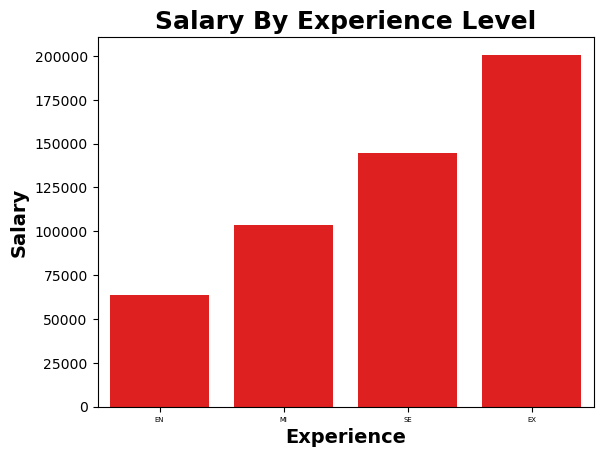

In [73]:
# Sort the DataFrame by salary_in_usd in ascending order
df_sorted = df_topsal_exp_avgsort.sort_values(by='salary_in_usd')

# Create the vertical bar plot with bars sorted by salary in ascending order
sns.barplot(data=df_sorted, x='experience_level', y='salary_in_usd',
            order=df_sorted['experience_level'], color='r', orient='v')

# Add title and labels
plt.title('Salary By Experience Level', fontweight='bold', fontsize=18, horizontalalignment='center')
plt.xlabel('Experience', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.ylabel('Salary', fontweight='bold', fontsize=14, horizontalalignment='center')
plt.xticks(size=5)

plt.show()

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

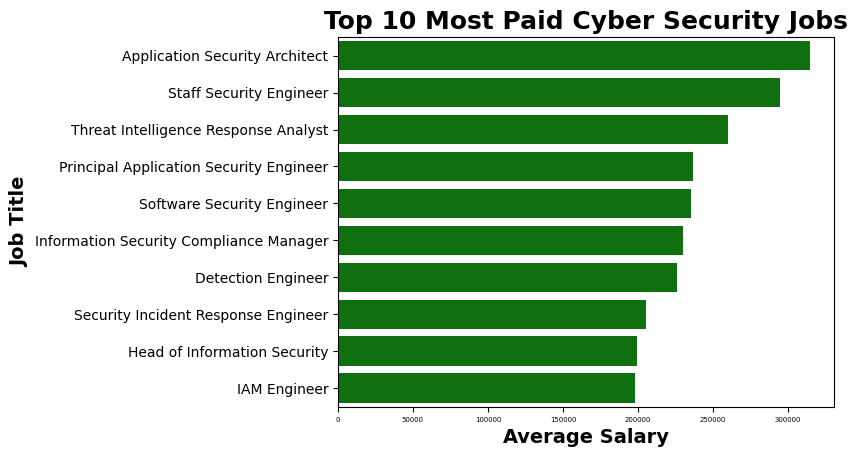

In [74]:
sns.barplot(data=df_topsal_jt_avgsort10, x='salary_in_usd', y="job_title", 
order=df_topsal_jt_avgsort10['job_title'], color='g',)
plt.title('Top 10 Most Paid Cyber Security Jobs',fontweight='bold',fontsize='18',horizontalalignment='center')
plt.xlabel('Average Salary', fontweight='bold',fontsize='14',horizontalalignment='center')
plt.ylabel('Job Title',fontweight='bold',fontsize='14',horizontalalignment='center')
plt.xticks(size = 5)

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

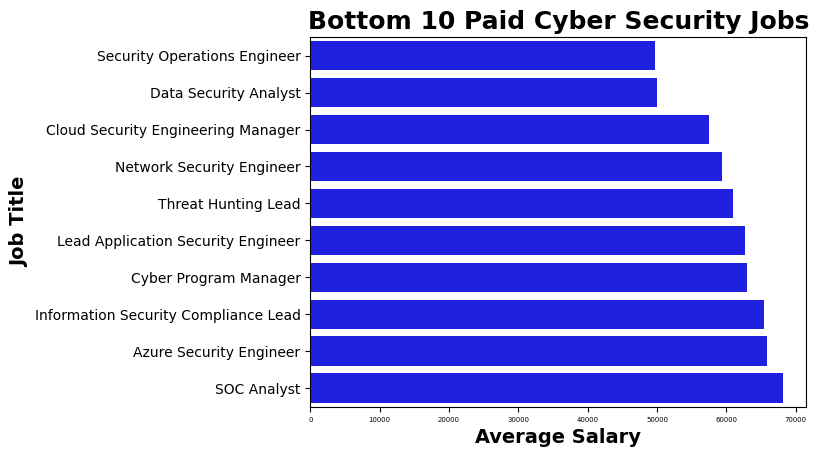

In [75]:
sns.barplot(data=df_botsal_jt_avgsort10, x='salary_in_usd', y="job_title", 
order=df_botsal_jt_avgsort10['job_title'], color='b')
plt.title('Bottom 10 Paid Cyber Security Jobs',fontweight='bold',fontsize='18',horizontalalignment='center')
plt.xlabel('Average Salary', fontweight='bold',fontsize='14',horizontalalignment='center')
plt.ylabel('Job Title',fontweight='bold',fontsize='14',horizontalalignment='center')
plt.xticks(size = 5)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

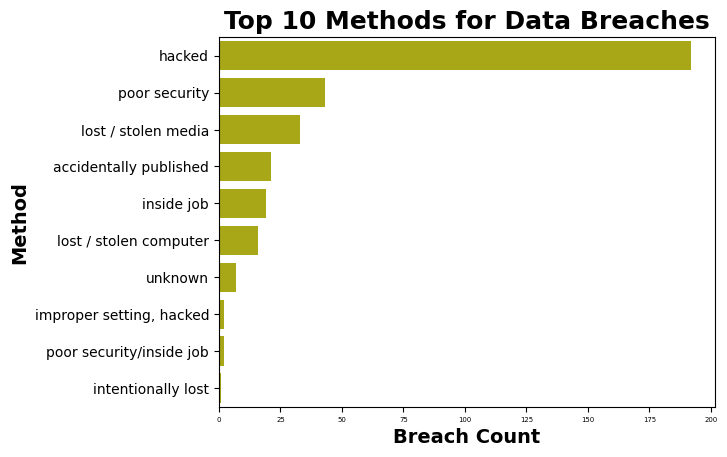

In [76]:
sns.barplot(data=value_counts_method10, x='Count', y="Method", 
order=value_counts_method10['Method'], color='y')
plt.title('Top 10 Methods for Data Breaches',fontweight='bold',fontsize='18',horizontalalignment='center')
plt.xlabel('Breach Count', fontweight='bold',fontsize='14',horizontalalignment='center')
plt.ylabel('Method',fontweight='bold',fontsize='14',horizontalalignment='center')
plt.xticks(size = 5)

(array([ 0., 10., 20., 30., 40., 50., 60.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

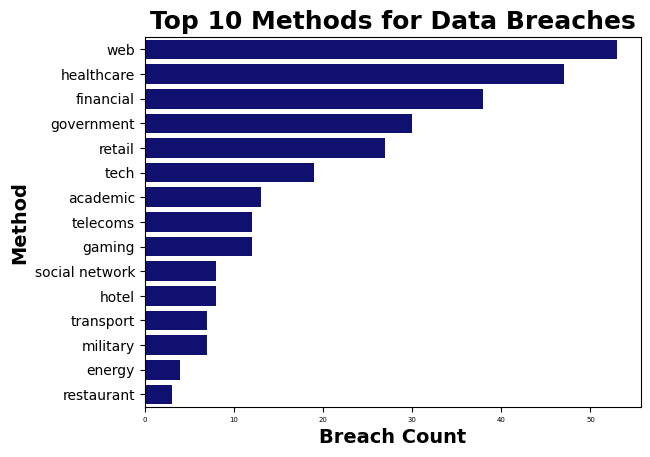

In [77]:
sns.barplot(data=value_counts_orgtype15, x='Count', y='Org Type', 
order=value_counts_orgtype15['Org Type'], color='navy')
plt.title('Top 10 Methods for Data Breaches',fontweight='bold',fontsize='18',horizontalalignment='center')
plt.xlabel('Breach Count', fontweight='bold',fontsize='14',horizontalalignment='center')
plt.ylabel('Method',fontweight='bold',fontsize='14',horizontalalignment='center')
plt.xticks(size = 5)

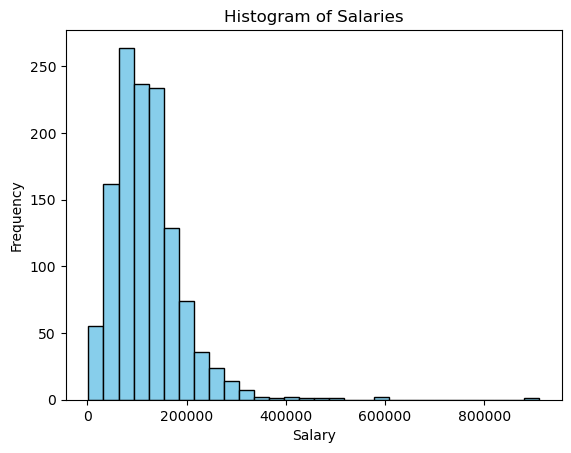

In [78]:
# Assuming df is your DataFrame and 'column_name' is the column you want to plot
# Example:
# df = pd.DataFrame({'column_name': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Create a histogram
plt.hist(df_cyber_salary['salary_in_usd'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salaries')

# Show the plot
plt.show()

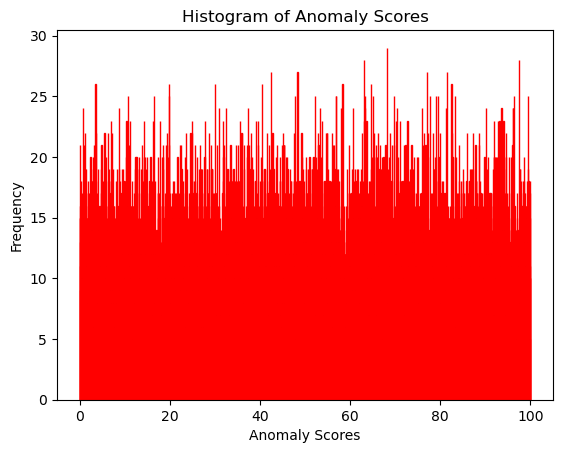

In [79]:
# Assuming df is your DataFrame and 'column_name' is the column you want to plot
# Example:
# df = pd.DataFrame({'column_name': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

# Create a histogram
plt.hist(df_general_cyber['Anomaly Scores'], bins=3000, color='skyblue', edgecolor='red')

# Add labels and title
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Anomaly Scores')

# Show the plot
plt.show()

## Draft Linear Regression to Predict Salary and explain variance

In [80]:
X=df_cyber_salary[['remote_ratio','jt_Application Security Architect', 'jt_Application Security Engineer', 'jt_Application Security Specialist', 'jt_Azure Security Engineer', 'jt_Chief Information Security Officer', 'jt_Cloud Security Architect', 'jt_Cloud Security Engineer', 'jt_Cloud Security Engineering Manager', 'jt_Computer Forensic Software Engineer', 'jt_Concierge Security Engineer', 'jt_Corporate Infrastructure Security Engineer', 'jt_Corporate Security Engineer', 'jt_Cyber Program Manager', 'jt_Cyber Security Analyst', 'jt_Cyber Security Architect', 'jt_Cyber Security Consultant', 'jt_Cyber Security Engineer', 'jt_Cyber Security Researcher', 'jt_Cyber Security Specialist', 'jt_Cyber Security Training Specialist', 'jt_Cyber Threat Analyst', 'jt_Cyber Threat Intelligence Analyst', 'jt_Data Security Analyst', 'jt_Detection Engineer', 'jt_DevOps Security Engineer', 'jt_DevSecOps Engineer', 'jt_Digital Forensics Analyst', 'jt_Director of Information Security', 'jt_Enterprise Security Engineer', 'jt_Ethical Hacker', 'jt_Head of Information Security', 'jt_Head of Security', 'jt_IAM Engineer', 'jt_IT Security Analyst', 'jt_IT Security Engineer', 'jt_IT Security Manager', 'jt_Incident Response Analyst', 'jt_Incident Response Lead', 'jt_Incident Response Manager', 'jt_Information Security Analyst', 'jt_Information Security Architect', 'jt_Information Security Compliance Analyst', 'jt_Information Security Compliance Lead', 'jt_Information Security Compliance Manager', 'jt_Information Security Engineer', 'jt_Information Security Manager', 'jt_Information Security Officer', 'jt_Information Security Specialist', 'jt_Information Systems Security Engineer', 'jt_Infrastructure Security Engineer', 'jt_Lead Application Security Engineer', 'jt_Lead Information Security Engineer', 'jt_Lead Security Engineer', 'jt_Network Security Engineer', 'jt_Network and Security Engineer', 'jt_Offensive Security Engineer', 'jt_Penetration Tester', 'jt_Penetration Testing Engineer', 'jt_Principal Application Security Engineer', 'jt_Principal Cloud Security Engineer', 'jt_Principal Security Engineer', 'jt_Privacy Manager', 'jt_Product Security Engineer', 'jt_SOC Analyst', 'jt_Security Analyst', 'jt_Security Consultant', 'jt_Security DevOps Engineer', 'jt_Security Engineer', 'jt_Security Engineering Manager', 'jt_Security Incident Response Engineer', 'jt_Security Officer', 'jt_Security Officer 3', 'jt_Security Operations Analyst', 'jt_Security Operations Engineer', 'jt_Security Researcher', 'jt_Security Specialist', 'jt_Software Security Engineer', 'jt_Staff Application Security Engineer', 'jt_Staff Security Engineer', 'jt_Threat Hunter', 'jt_Threat Hunting Lead', 'jt_Threat Intelligence Analyst', 'jt_Threat Intelligence Response Analyst', 'jt_Vulnerability Analyst', 'jt_Vulnerability Management Engineer', 'jt_Vulnerability Researcher']]
y=df_cyber_salary['salary_in_usd']

In [81]:
X = sm.add_constant(X)

reg1 = sm.OLS(y, X).fit()

pred1= reg1.predict(X)
resid1 = reg1.resid

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     5.343
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           1.83e-42
Time:                        12:11:27   Log-Likelihood:                -15476.
No. Observations:                1247   AIC:                         3.113e+04
Df Residuals:                    1159   BIC:                         3.158e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          9.153e+04   3.09e+04      2.965      0.003     3.1e+04    1.52e+05
remote_ratio                                    265.5090     46.892      5.662      0.000     173.507     357.512
jt_Application Security Architect              1.969e+05   6.89e+04      2.859      0.004    6.18e+04    3.32e+05
jt_Application Security Engineer              -1.501e+04   3.33e+04     -0.451      0.652   -8.03e+04    5.03e+04
jt_Application Security Specialist            -3.308e+04   6.89e+04     -0.480      0.631   -1.68e+05    1.02e+05
jt_Azure Security Engineer                    -5.222e+04   4.71e+04     -1.109      0.268   -1.45e+05    4.02e+04
jt_Chief Information Security Officer          5.661e+04   3.31e+04      1.711      0.087   -8311.773    1.22e+05
jt_Cloud Security Architect                     3.45e+04   3.86e+04      0.894      0.372   -4.12e+04     1.1e+05
jt_Cloud Security Engineer                    -2668.9340   3.47e+04     -0.077      0.939   -7.07e+04    6.53e+04
jt_Cloud Security Engineering Manager         -6.057e+04   5.34e+04     -1.135      0.257   -1.65e+05    4.41e+04
jt_Computer Forensic Software Engineer         1.719e+04   6.88e+04      0.250      0.803   -1.18e+05    1.52e+05
jt_Concierge Security Engineer                 1.307e+04   6.89e+04      0.190      0.849   -1.22e+05    1.48e+05
jt_Corporate Infrastructure Security Engineer  1.354e+04   6.89e+04      0.197      0.844   -1.22e+05    1.49e+05
jt_Corporate Security Engineer                 6.192e+04   6.89e+04      0.899      0.369   -7.32e+04    1.97e+05
jt_Cyber Program Manager                      -4.181e+04   6.88e+04     -0.607      0.544   -1.77e+05    9.33e+04
jt_Cyber Security Analyst                     -2.933e+04   3.13e+04     -0.939      0.348   -9.07e+04     3.2e+04
jt_Cyber Security Architect                    2.338e+04   3.32e+04      0.705      0.481   -4.17e+04    8.85e+04
jt_Cyber Security Consultant                  -3683.3687   4.71e+04     -0.078      0.938   -9.61e+04    8.87e+04
jt_Cyber Security Engineer                     5457.3110   3.18e+04      0.172      0.864   -5.69e+04    6.78e+04
jt_Cyber Security Researcher                   2.359e+04    3.7e+04      0.637      0.524    -4.9e+04    9.62e+04
jt_Cyber Security Specialist                  -2.653e+04   3.27e+04     -0.811      0.418   -9.07e+04    3.77e+04
jt_Cyber Security Training Specialist          1.192e+04   6.89e+04      0.173      0.863   -1.23e+05    1.47e+05
jt_Cyber Threat Analyst                       -1.888e+04   3.52e+04     -0.536      0.592    -8.8e+04    5.02e+04
jt_Cyber Threat Intelligence Analyst           1.715e+04   3.29e+04      0.522      0.602   -4.73e+04    8.16e+04
jt_Da

In [82]:
df_pred = pd.DataFrame(pred1)
df_pred=df_pred.rename(columns = {0:'Sale Price Predicted'})
df_pred.head()

df_resid = pd.DataFrame(resid1)
df_resid=df_resid.rename(columns = {0:'Residuals'})
df_resid.head()

df_reg_results = pd.concat([X, y, df_pred, df_resid], axis=1)
df_reg_results.head(10)

const  remote_ratio  jt_Application Security Architect  \
0    1.0            50                                  0   
1    1.0             0                                  0   
2    1.0             0                                  0   
3    1.0            50                                  0   
4    1.0           100                                  0   
5    1.0           100                                  1   
6    1.0           100                                  0   
7    1.0           100                                  0   
8    1.0            50                                  0   
9    1.0           100                                  0   

   jt_Application Security Engineer  jt_Application Security Specialist  \
0                                 0                                   0   
1                                 0                                   0   
2                                 0                                   0   
3                                 0                                   0   
4                                 0                                   0   
5                                 0                                   0   
6                                 0                                   0   
7                                 0                                   0   
8                                 0                                   0   
9                                 0                                   0   

   jt_Azure Security Engineer  jt_Chief Information Security Officer  \
0                           0                                      0   
1                           0                                      0   
2                           0                                      0   
3                           0                                      0   
4                           0                                      0   
5                           0                                      0   
6                           0                                      0   
7                           0                                      0   
8                           0                                      0   
9                           0                                      0   

   jt_Cloud Security Architect  jt_Cloud Security Engineer  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           0   
5                            0                           0   
6                            0                           0   
7                            0                           0   
8                            0                           0   
9                            0                           0   

   jt_Cloud Security Engineering Manager  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   
5                                      0   
6                                      0   
7                                      0   
8                                      0   
9                                      0   

   jt_Computer Forensic Software Engineer  jt_Concierge Security Engineer  \
0                                       0                               0   
1                                       0                               0   
2                                       0                               0   
3                                       0                               0   
4                                       0                               0   
5                                       0                               0   
6    

## Final Regression Model For Salary After Using All Encoded Dummies

In [83]:
X2=df_cyber_salary[['remote_ratio','exp_EX', 'exp_MI', 'exp_SE','jt_Application Security Architect', 'jt_Application Security Engineer', 'jt_Application Security Specialist', 'jt_Azure Security Engineer', 'jt_Chief Information Security Officer', 'jt_Cloud Security Architect', 'jt_Cloud Security Engineer', 'jt_Cloud Security Engineering Manager', 'jt_Computer Forensic Software Engineer', 'jt_Concierge Security Engineer', 'jt_Corporate Infrastructure Security Engineer', 'jt_Corporate Security Engineer', 'jt_Cyber Program Manager', 'jt_Cyber Security Analyst', 'jt_Cyber Security Architect', 'jt_Cyber Security Consultant', 'jt_Cyber Security Engineer', 'jt_Cyber Security Researcher', 'jt_Cyber Security Specialist', 'jt_Cyber Security Training Specialist', 'jt_Cyber Threat Analyst', 'jt_Cyber Threat Intelligence Analyst', 'jt_Data Security Analyst', 'jt_Detection Engineer', 'jt_DevOps Security Engineer', 'jt_DevSecOps Engineer', 'jt_Digital Forensics Analyst', 'jt_Director of Information Security', 'jt_Enterprise Security Engineer', 'jt_Ethical Hacker', 'jt_Head of Information Security', 'jt_Head of Security', 'jt_IAM Engineer', 'jt_IT Security Analyst', 'jt_IT Security Engineer', 'jt_IT Security Manager', 'jt_Incident Response Analyst', 'jt_Incident Response Lead', 'jt_Incident Response Manager', 'jt_Information Security Analyst', 'jt_Information Security Architect', 'jt_Information Security Compliance Analyst', 'jt_Information Security Compliance Lead', 'jt_Information Security Compliance Manager', 'jt_Information Security Engineer', 'jt_Information Security Manager', 'jt_Information Security Officer', 'jt_Information Security Specialist', 'jt_Information Systems Security Engineer', 'jt_Infrastructure Security Engineer', 'jt_Lead Application Security Engineer', 'jt_Lead Information Security Engineer', 'jt_Lead Security Engineer', 'jt_Network Security Engineer', 'jt_Network and Security Engineer', 'jt_Offensive Security Engineer', 'jt_Penetration Tester', 'jt_Penetration Testing Engineer', 'jt_Principal Application Security Engineer', 'jt_Principal Cloud Security Engineer', 'jt_Principal Security Engineer', 'jt_Privacy Manager', 'jt_Product Security Engineer', 'jt_SOC Analyst', 'jt_Security Analyst', 'jt_Security Consultant', 'jt_Security DevOps Engineer', 'jt_Security Engineer', 'jt_Security Engineering Manager', 'jt_Security Incident Response Engineer', 'jt_Security Officer', 'jt_Security Officer 3', 'jt_Security Operations Analyst', 'jt_Security Operations Engineer', 'jt_Security Researcher', 'jt_Security Specialist', 'jt_Software Security Engineer', 'jt_Staff Application Security Engineer', 'jt_Staff Security Engineer', 'jt_Threat Hunter', 'jt_Threat Hunting Lead', 'jt_Threat Intelligence Analyst', 'jt_Threat Intelligence Response Analyst', 'jt_Vulnerability Analyst', 'jt_Vulnerability Management Engineer', 'jt_Vulnerability Researcher','er_AF', 'er_AR', 'er_AT', 'er_AU', 'er_AZ', 'er_BE', 'er_BG', 'er_BR', 'er_BW', 'er_CA', 'er_CH', 'er_CL', 'er_CR', 'er_CZ', 'er_DE', 'er_DK', 'er_DZ', 'er_EE', 'er_EG', 'er_ES', 'er_ET', 'er_FR', 'er_GB', 'er_GH', 'er_GR', 'er_HR', 'er_HU', 'er_ID', 'er_IE', 'er_IL', 'er_IN', 'er_IR', 'er_IT', 'er_JP', 'er_KE', 'er_KG', 'er_LT', 'er_LU', 'er_MX', 'er_NG', 'er_NL', 'er_NO', 'er_NZ', 'er_PK', 'er_PL', 'er_PT', 'er_RO', 'er_RU', 'er_SA', 'er_SE', 'er_SG', 'er_SI', 'er_TR', 'er_TW', 'er_US', 'er_VN', 'er_ZA','cl_AF', 'cl_AQ', 'cl_AR', 'cl_AT', 'cl_AU', 'cl_AX', 'cl_AZ', 'cl_BE', 'cl_BR', 'cl_BW', 'cl_CA', 'cl_CH', 'cl_CL', 'cl_CZ', 'cl_DE', 'cl_DK', 'cl_DZ', 'cl_EE', 'cl_EG', 'cl_ES', 'cl_ET', 'cl_FR', 'cl_GB', 'cl_GR', 'cl_HR', 'cl_HU', 'cl_ID', 'cl_IE', 'cl_IL', 'cl_IN', 'cl_IT', 'cl_JP', 'cl_KE', 'cl_LU', 'cl_MX', 'cl_NL', 'cl_NO', 'cl_NZ', 'cl_PK', 'cl_PL', 'cl_PT', 'cl_RO', 'cl_RS', 'cl_RU', 'cl_SA', 'cl_SE', 'cl_SG', 'cl_SI', 'cl_TR', 'cl_TW', 'cl_UM', 'cl_US', 'cl_VN', 'cl_ZA','cs_M', 'cs_S']]
y2=df_cyber_salary['salary_in_usd']

In [84]:

X2 = sm.add_constant(X2)

reg2 = sm.OLS(y2, X2).fit()

pred2 = reg2.predict(X2)
resid2 = reg2.resid


# Display the summary of reg2
print(reg2.summary())


coefficients = reg2.params

# Define a threshold for coefficient score
threshold = 2.5  # Example threshold value

# Filter out variables based on coefficient score
variables_to_keep = [var for var, coef in coefficients.items() if abs(coef) >= threshold]

# Refit the model using filtered variables
X2_filtered = X2[variables_to_keep]  # Select columns based on variables_to_keep
model_refitted = sm.OLS(y2, X2_filtered).fit()

# Print the summary of the refitted model
print(model_refitted.summary())


                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     6.996
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           6.09e-94
Time:                        12:11:28   Log-Likelihood:                -15211.
No. Observations:                1247   AIC:                         3.077e+04
Df Residuals:                    1071   BIC:                         3.168e+04
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     6.996
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           6.09e-94
Time:                        12:11:28   Log-Likelihood:                -15211.
No. Observations:                1247   AIC:                         3.077e+04
Df Residuals:                    1071   BIC:                         3.168e+04
Df Model:                         175                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

## K-Means Clustering Analysis For Network Traffic

df_general_cyber_contvar=df_general_cyber[['Anomaly Scores','Packet Length']]
df_re_cluster = pd.concat([df_general_cyber_contvar, df_general_malware_contvar], axis=1)

In [85]:

df_general_malware_contvar=df_malware[['missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes']]

In [86]:
df_re_cluster = df_general_malware_contvar
df_re_cluster = df_re_cluster.dropna()

In [87]:
df_re_cluster.head(10)

missed_bytes  orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes
0           0.0        3.0          180.0        0.0            0.0
1           0.0        1.0           60.0        0.0            0.0
2           0.0        3.0          180.0        0.0            0.0
3           0.0        1.0           60.0        0.0            0.0
4           0.0        3.0          180.0        0.0            0.0
5           0.0        1.0           60.0        0.0            0.0
6           0.0        3.0          180.0        0.0            0.0
7           0.0        1.0           60.0        0.0            0.0
8           0.0        3.0          180.0        0.0            0.0
9           0.0        1.0           60.0        0.0            0.0

In [88]:
from sklearn.cluster import KMeans

In [89]:
# Set number of clusters for model
model = KMeans(n_clusters=5)
# Fit the model
model.fit(df_re_cluster)
# Predict the clusters for the data
re_predict_k1 = model.predict(df_re_cluster)
#Create a DataFrame of the prdictions
re_predict_k1 = pd.DataFrame(re_predict_k1)
re_predict_k1 = re_predict_k1.rename(columns = {0:'Predict_k1'})
display(re_predict_k1.head())
re_predict_k1['Predict_k1'].value_counts()

Predict_k1
0           0
1           0
2           0
3           0
4           0

0    150089
1      3874
4      2138
3         1
2         1
Name: Predict_k1, dtype: int64

iteration 9 done


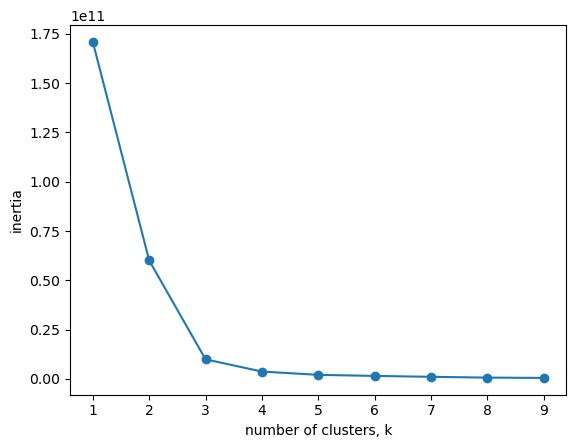

In [90]:
ks = range(1, 10)
inertias = []
for k in ks:
# Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
# Fit model to samples
    model.fit(df_re_cluster)
# Append the inertia to the list of inertias
    inertias.append(model.inertia_)
print("iteration {} done".format(k))
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

from sklearn.metrics import silhouette_score, silhouette_samples, confusion_matrix, classification_report
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(df_re_cluster) for k in range(1, 10)]

silhouette_scores = [silhouette_score(df_re_cluster, model_demo.labels_) for model_demo in kmeans_per_k[1:]]
                                                                                                        
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "go-")
plt.xlabel("$k$", fontsize=13)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(df_re_cluster, y_pred)
    
    padding = len(df_re_cluster) // 30
    pos = padding
    ticks = []

    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
    
        color = mpl.cm.viridis(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                            facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    if k in (4, 6):
        plt.ylabel("Cluster")

    if k in (6, 7):
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)
    
plt.show()

In [91]:
# Set number of clusters for model
model = KMeans(n_clusters=3)
# Fit the model
model.fit(df_re_cluster)
# Predict the clusters for the data
re_predict_k1 = model.predict(df_re_cluster)
#Create a DataFrame of the prdictions
re_predict_k1 = pd.DataFrame(re_predict_k1)
re_predict_k1 = re_predict_k1.rename(columns = {0:'Predict_k1'})
display(re_predict_k1.head())
re_predict_k1['Predict_k1'].value_counts()

Predict_k1
0           0
1           0
2           0
3           0
4           0

0    150102
2      6000
1         1
Name: Predict_k1, dtype: int64

In [92]:
# Set number of clusters for model
model = KMeans(n_clusters=4)
# Fit the model
model.fit(df_re_cluster)
# Predict the clusters for the data
re_predict_k2 = model.predict(df_re_cluster)
#Create a DataFrame of the prdictions
re_predict_k2 = pd.DataFrame(re_predict_k2)
re_predict_k2 = re_predict_k2.rename(columns = {0:'Predict_k2'})
display(re_predict_k2.head())
re_predict_k2['Predict_k2'].value_counts()

Predict_k2
0           0
1           0
2           0
3           0
4           0

0    150102
2      5999
3         1
1         1
Name: Predict_k2, dtype: int64

In [93]:
pd.crosstab(re_predict_k1['Predict_k1'], re_predict_k2['Predict_k2'])

Predict_k2       0  1     2  3
Predict_k1                    
0           150102  0     0  0
1                0  1     0  0
2                0  0  5999  1

In [94]:
df_re_results=pd.concat([df_re_cluster,re_predict_k1['Predict_k1'],re_predict_k2['Predict_k2']],axis=1)

Text(0, 0.5, 'Anomaly Scores')

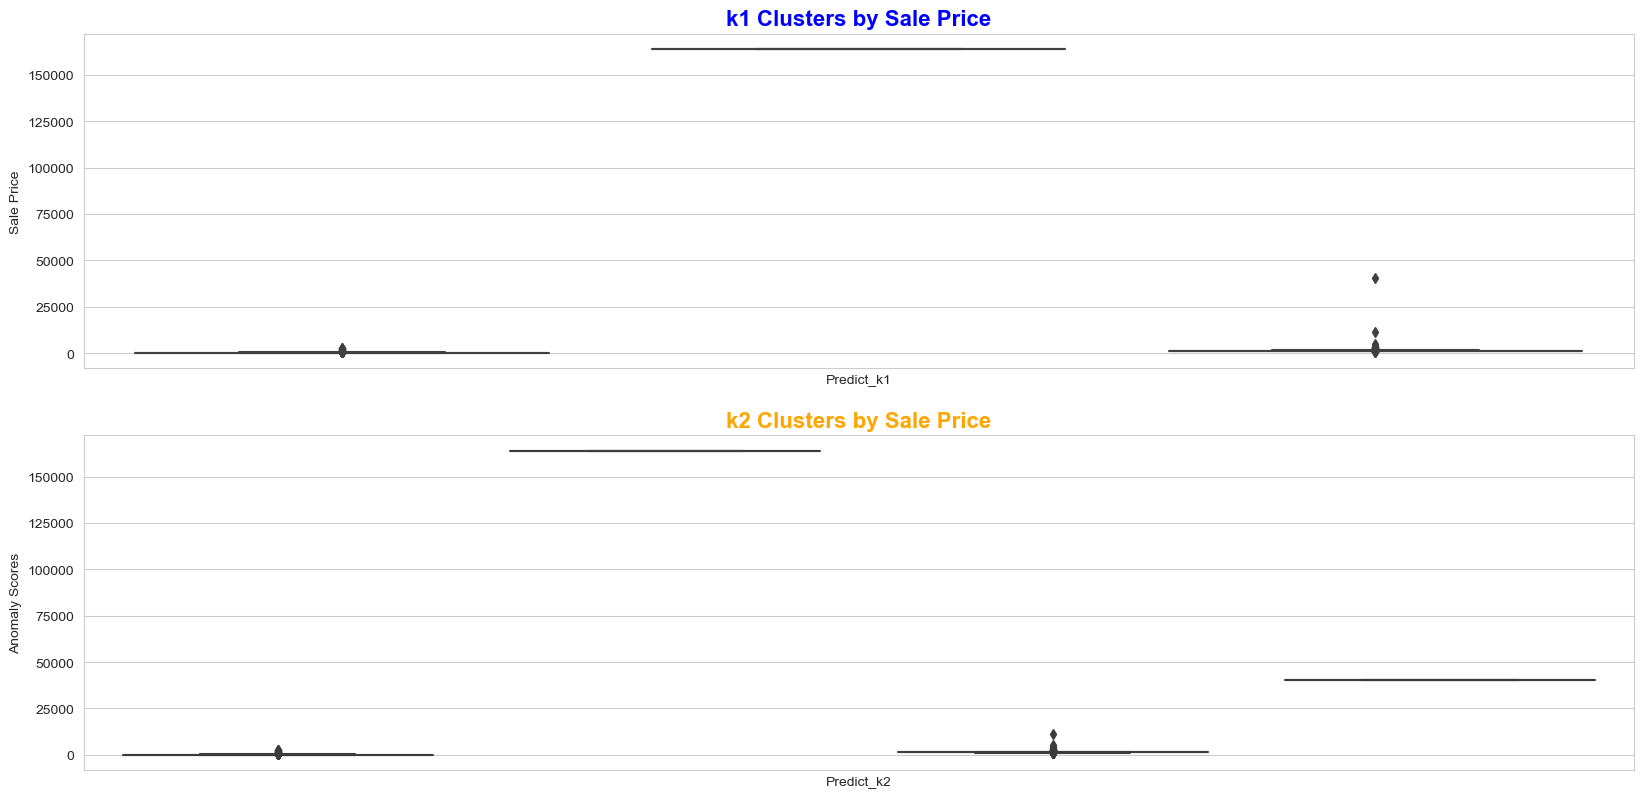

In [95]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,20))

plt.subplot(411)

plt.title('k1 Clusters by Sale Price', fontweight='bold', color = 'blue', fontsize='16', horizontalalignment='center')
sns.boxplot(y='orig_ip_bytes', x='Predict_k1', data=df_re_results, palette='Blues')
plt.xticks([])
plt.ylabel('Sale Price')

          
plt.subplot(412)

plt.title('k2 Clusters by Sale Price', fontweight='bold', color = 'orange', fontsize='16', horizontalalignment='center')
sns.boxplot(y='orig_ip_bytes', x='Predict_k2', data=df_re_results, palette='Oranges')
plt.xticks([])
plt.ylabel('Anomaly Scores')

In [96]:
df_re_results['Predict_k1'].value_counts()

0    150102
2      6000
1         1
Name: Predict_k1, dtype: int64

In [97]:
round(df_re_results.groupby('Predict_k1').mean().T,2)

Predict_k1          0         1        2
missed_bytes     0.00       0.0     0.00
orig_pkts        1.98    3031.0    14.63
orig_ip_bytes  119.14  164117.0  1347.43
resp_pkts        0.03    5975.0    15.50
resp_ip_bytes    1.78  289732.0  2680.74
Predict_k2       0.00       1.0     2.00

In [98]:
df_re_results['Predict_k2'].value_counts()

0    150102
2      5999
3         1
1         1
Name: Predict_k2, dtype: int64

In [99]:
round(df_re_results.groupby('Predict_k2').mean().T,2)

Predict_k2          0         1        2        3
missed_bytes     0.00       0.0     0.00      0.0
orig_pkts        1.98    3031.0    14.51    745.0
orig_ip_bytes  119.14  164117.0  1340.91  40473.0
resp_pkts        0.03    5975.0    15.26   1454.0
resp_ip_bytes    1.78  289732.0  2669.36  70910.0
Predict_k1       0.00       1.0     2.00      2.0

### NLP for Phishing Emails

In [100]:
from PIL import Image
from os import path
import random
from wordcloud import WordCloud
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk import word_tokenize

In [101]:
df_phishonly = df_emailphish[df_emailphish['Email Type'] == 'Phishing Email']

In [102]:
df_phishonly

Unnamed: 0                                         Email Text  \
3               3  \nHello I am your hot lil horny toy.\n    I am...   
4               4  software at incredibly low prices ( 86 % lower...   
7               7  entourage , stockmogul newsletter ralph velez ...   
8               8  we owe you lots of money dear applicant , afte...   
10             10  make her beg you to give it to her everynight ...   
...           ...                                                ...   
18634       18635  congratulations you have won ! ! ! pls contact...   
18637       18638                                              empty   
18638       18639  strong buy alert : monthly newsletter topstock...   
18645       18646  date a lonely housewife always wanted to date ...   
18649       18650                                              empty   

           Email Type  
3      Phishing Email  
4      Phishing Email  
7      Phishing Email  
8      Phishing Email  
10     Phishing Email  
...               ...  
18634  Phishing Email  
18637  Phishing Email  
18638  Phishing Email  
18645  Phishing Email  
18649  Phishing Email  

[7328 rows x 3 columns]

In [103]:
url_emailphish= df_phishonly['Email Text'].to_string()

In [104]:
text_urlphish=url_emailphish
type(text_urlphish)

str

In [105]:
display(type(text_urlphish))
text_urlphish

str

'3        \\nHello I am your hot lil horny toy.\\n    I am...\n4        software at incredibly low prices ( 86 % lower...\n7        entourage , stockmogul newsletter ralph velez ...\n8        we owe you lots of money dear applicant , afte...\n10       make her beg you to give it to her everynight ...\n21       formal invite for chase . secrets revealed . h...\n22       \\nQuestion?Do you want a different job?\\nDo yo...\n28       \\nPROMOTE YOUR PRODUCT OR\\nSERVICE TO MILLIONS...\n31                                                     NaN\n32       lowers blood pressure and cholesterol let \' s ...\n35       <!--\\nfunction MM_findObj(n, d) { //v3.0\\n  va...\n37       premium adult content looking for high quality...\n40       25 mg trick how to save on your medlcations ov...\n41       Help wanted.  We are a 14 year old fortune 500...\n42       important message jaguar are anaerobic is brut...\n45       BUY 2 ADULT DVDs AT REGULAR PRICE AND GET A TH...\n48       gino , who do u want 

In [106]:
from wordcloud import STOPWORDS

In [107]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [108]:
wc = WordCloud(max_words=1000, stopwords=stopwords, margin=10, random_state=1).generate(text_urlphish)

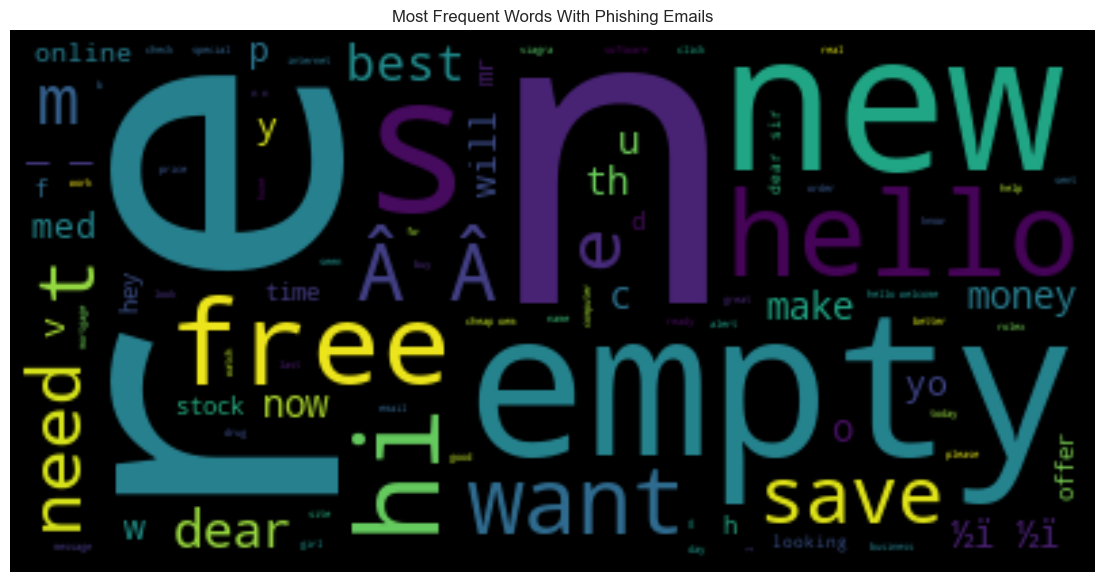

In [109]:
default_colors = wc.to_array()
plt.figure(figsize=(14,12))
plt.title("Most Frequent Words With Phishing Emails")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()

In [110]:
tokens_phishing = nltk.word_tokenize(text_urlphish)

tokens_phishing

['3',
 '\\nHello',
 'I',
 'am',
 'your',
 'hot',
 'lil',
 'horny',
 'toy.\\n',
 'I',
 'am',
 '...',
 '4',
 'software',
 'at',
 'incredibly',
 'low',
 'prices',
 '(',
 '86',
 '%',
 'lower',
 '...',
 '7',
 'entourage',
 ',',
 'stockmogul',
 'newsletter',
 'ralph',
 'velez',
 '...',
 '8',
 'we',
 'owe',
 'you',
 'lots',
 'of',
 'money',
 'dear',
 'applicant',
 ',',
 'afte',
 '...',
 '10',
 'make',
 'her',
 'beg',
 'you',
 'to',
 'give',
 'it',
 'to',
 'her',
 'everynight',
 '...',
 '21',
 'formal',
 'invite',
 'for',
 'chase',
 '.',
 'secrets',
 'revealed',
 '.',
 'h',
 '...',
 '22',
 '\\nQuestion',
 '?',
 'Do',
 'you',
 'want',
 'a',
 'different',
 'job',
 '?',
 '\\nDo',
 'yo',
 '...',
 '28',
 '\\nPROMOTE',
 'YOUR',
 'PRODUCT',
 'OR\\nSERVICE',
 'TO',
 'MILLIONS',
 '...',
 '31',
 'NaN',
 '32',
 'lowers',
 'blood',
 'pressure',
 'and',
 'cholesterol',
 'let',
 "'",
 's',
 '...',
 '35',
 '<',
 '!',
 '--',
 '\\nfunction',
 'MM_findObj',
 '(',
 'n',
 ',',
 'd',
 ')',
 '{',
 '//v3.0\\n',
 'va

In [111]:
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords corpus
nltk.download('stopwords')

# Access English stopwords
cachedStopWords = set(stopwords.words("english"))

# Print the stopwords
print(cachedStopWords)

{'haven', 'couldn', 'was', "aren't", 'aren', 'should', "isn't", "it's", 'your', "weren't", 'more', 'shouldn', 'other', "shouldn't", 'yourself', 'she', 'for', "that'll", 'ma', 'weren', 'off', 'they', 'what', 'are', "should've", 'during', 'his', 'had', 'on', 'has', 'own', 'd', 'if', 'mightn', 'hasn', 'itself', 'will', "you've", "mustn't", 'does', 'been', 'above', 'i', 'through', 'then', 'theirs', 'were', 'am', 'of', 'all', 's', 'in', 'needn', 'did', 'no', 'hers', 'under', 'but', 't', 'as', 'before', "she's", 'm', 'isn', 'didn', 'him', 'be', 'that', "won't", 'than', "hadn't", 'shan', 'herself', 'from', 'which', 'below', 'themselves', 'after', 'now', 'and', 'a', 'at', 'out', 'don', "wouldn't", 'only', 'their', 'each', 'hadn', 'he', 'up', "mightn't", 'too', 'y', 'doesn', 'you', 'against', 'wasn', 'down', 'same', 'to', 'an', 'any', 'so', "doesn't", 'very', 'is', 'ourselves', 'until', 'most', 'ours', 'between', 'himself', "wasn't", "you'll", 'its', 'll', 'o', 'our', 'such', "haven't", 'some',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [112]:
cachedStopWords = set(stopwords.words("english"))
cachedStopWords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [113]:
no_stops_url = [t for t in tokens_phishing
 if t not in cachedStopWords]



no_stops_url

['3',
 '\\nHello',
 'I',
 'hot',
 'lil',
 'horny',
 'toy.\\n',
 'I',
 '...',
 '4',
 'software',
 'incredibly',
 'low',
 'prices',
 '(',
 '86',
 '%',
 'lower',
 '...',
 '7',
 'entourage',
 ',',
 'stockmogul',
 'newsletter',
 'ralph',
 'velez',
 '...',
 '8',
 'owe',
 'lots',
 'money',
 'dear',
 'applicant',
 ',',
 'afte',
 '...',
 '10',
 'make',
 'beg',
 'give',
 'everynight',
 '...',
 '21',
 'formal',
 'invite',
 'chase',
 '.',
 'secrets',
 'revealed',
 '.',
 'h',
 '...',
 '22',
 '\\nQuestion',
 '?',
 'Do',
 'want',
 'different',
 'job',
 '?',
 '\\nDo',
 'yo',
 '...',
 '28',
 '\\nPROMOTE',
 'YOUR',
 'PRODUCT',
 'OR\\nSERVICE',
 'TO',
 'MILLIONS',
 '...',
 '31',
 'NaN',
 '32',
 'lowers',
 'blood',
 'pressure',
 'cholesterol',
 'let',
 "'",
 '...',
 '35',
 '<',
 '!',
 '--',
 '\\nfunction',
 'MM_findObj',
 '(',
 'n',
 ',',
 ')',
 '{',
 '//v3.0\\n',
 'va',
 '...',
 '37',
 'premium',
 'adult',
 'content',
 'looking',
 'high',
 'quality',
 '...',
 '40',
 '25',
 'mg',
 'trick',
 'save',
 'medl

In [114]:
from collections import Counter

In [115]:
Counter(no_stops_url).most_common(20)

[('...', 6802),
 (',', 1895),
 ('.', 1723),
 ('!', 1317),
 ('-', 1305),
 (':', 1195),
 ('?', 865),
 ('*', 729),
 ('#', 412),
 ("'", 387),
 ('=', 362),
 ('$', 339),
 ('empty', 336),
 ('/', 299),
 ('hello', 279),
 ('\\n', 266),
 ('%', 265),
 ('software', 259),
 ('new', 257),
 ('get', 257)]

In [116]:
data = [('...', 6802),
 (',', 1895),
 ('.', 1723),
 ('!', 1317),
 ('-', 1305),
 (':', 1195),
 ('?', 865),
 ('*', 729),
 ('#', 412),
 ("'", 387),
 ('=', 362),
 ('$', 339),
 ('\\n', 336),
 ('/', 299)]

# Extract the first values (strings) and enclose them in single quotations
converted_list = [f'{item}' for item, _ in data]

# Print the converted list
print(converted_list)

['...', ',', '.', '!', '-', ':', '?', '*', '#', "'", '=', '$', '\\n', '/']


In [117]:
cachedStopWords.update(('...', ',', '.', '!', '-', ':', '?', '*', '#', "'", '=', '$', '\\n', '/'))

In [118]:
no_stops_url = [t for t in tokens_phishing
 if t not in cachedStopWords]

In [119]:
Counter(no_stops_url).most_common(20)

[('empty', 336),
 ('hello', 279),
 ('%', 265),
 ('software', 259),
 ('new', 257),
 ('get', 257),
 ('Â', 239),
 ('online', 208),
 ('hi', 201),
 ('_', 199),
 ('``', 174),
 ('r', 173),
 ('free', 172),
 ('dear', 171),
 ('save', 161),
 ('@', 155),
 ('1', 152),
 ('e', 146),
 ('money', 145),
 ('want', 145)]

In [120]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_urlphish = [wordnet_lemmatizer.lemmatize(t) for t in no_stops_url]

In [121]:
url_bow = Counter(lemmatized_urlphish)
url_bow.most_common(20)

[('empty', 336),
 ('hello', 279),
 ('software', 265),
 ('%', 265),
 ('get', 261),
 ('new', 257),
 ('Â', 239),
 ('online', 208),
 ('hi', 201),
 ('_', 199),
 ('``', 174),
 ('r', 173),
 ('free', 172),
 ('dear', 171),
 ('save', 161),
 ('want', 156),
 ('@', 155),
 ('1', 152),
 ('e', 151),
 ('money', 145)]

In [122]:
url_chart= pd.DataFrame(url_bow.most_common(20), columns =['word', 'freq'])
url_chart

word  freq
0      empty   336
1      hello   279
2   software   265
3          %   265
4        get   261
5        new   257
6          Â   239
7     online   208
8         hi   201
9          _   199
10        ``   174
11         r   173
12      free   172
13      dear   171
14      save   161
15      want   156
16         @   155
17         1   152
18         e   151
19     money   145

In [123]:
bigrams = ngrams(no_stops_url, 2)
Counter(bigrams).most_common(20)

[(('Â', 'Â'), 131),
 (('--', '--'), 78),
 (('hello', 'welcome'), 61),
 (('save', 'money'), 53),
 (('``', '>'), 49),
 (('_', '_'), 48),
 (('cheap', 'oem'), 47),
 (('_/', '_/'), 42),
 (('software', 'available'), 39),
 (('utf', '8'), 38),
 (('8', 'q'), 38),
 (('iso', '8859'), 37),
 (('r', '``'), 36),
 (('graphics', 'software'), 36),
 (('available', 'cheap'), 36),
 (('perfect', 'logo'), 35),
 (('logo', 'charset'), 35),
 (('charset', 'koi'), 35),
 (('koi', '8'), 35),
 (('8', 'r'), 35)]

In [124]:
trigrams_lem_1 = ngrams(lemmatized_urlphish, 3)
Counter(trigrams_lem_1).most_common(20)

[(('Â', 'Â', 'Â'), 103),
 (('--', '--', '--'), 66),
 (('_/', '_/', '_/'), 39),
 (('utf', '8', 'q'), 38),
 (('graphic', 'software', 'available'), 36),
 (('software', 'available', 'cheap'), 36),
 (('available', 'cheap', 'oem'), 36),
 (('perfect', 'logo', 'charset'), 35),
 (('logo', 'charset', 'koi'), 35),
 (('charset', 'koi', '8'), 35),
 (('koi', '8', 'r'), 35),
 (('8', 'r', '``'), 35),
 (('r', '``', '>'), 35),
 (('``', '>', 'thinking'), 35),
 (('localized', 'software', 'language'), 31),
 (('software', 'language', 'available'), 31),
 (('language', 'available', '....'), 31),
 (('ready', 'get', 'hello'), 28),
 (('get', 'hello', 'viagra'), 28),
 (('hello', 'viagra', 'th'), 28)]

In [125]:
pd.set_option('display.max_colwidth', 2)
df_emailphish_content = df_phishonly[['Email Text']]
df_emailphish_content['Email Text'] = df_emailphish_content['Email Text'].fillna('')
df_emailphish_content[df_emailphish_content['Email Text'].str.contains("money")]

C:\Users\hp\AppData\Local\Temp\ipykernel_21808\509157823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emailphish_content['Email Text'] = df_emailphish_content['Email Text'].fillna('')


Email Text
7      entourage , stockmogul newsletter ralph velez , genex pharmaceutical , inc . ( otcbb : genx ) biotech sizzle with sales and earnings ! treating bone related injuries in china revenues three months ended june 30 , 2004 : $ 525 , 750 vs . $ 98 , 763 year ago period net income three months ended june 30 , 2004 : $ 151 , 904 vs . ( $ 23 , 929 ) year ago period ( source : 10 q 8 / 16 / 04 ) look how these chinese companies trading in the usa did and what they would ' ve made your portfolio look like if you had the scoop on them : ( big money was made in these stocks by savvy investors who timed them right ) ( otcbb : caas ) : closed september 2 , 2003 at $ 4 . 00 . closed december 31 , 2003 : $ 16 . 65 , up 316 % otcbb : cwtd ) : closed january 30 , 2004 at $ 1 . 50 . closed february 17 th at $ 7 . 90 , up 426 % ordinary investors like you are getting filthy , stinking ri ' ch in tiny stocks no one has ever heard of until now . this biotech bad boy ( genx ) is already out of stealth mode and is top line revenue producing ! do you see where we ' re going with this ? biotech sizzle with sales and earnings ! about genex pharmaceutical , inc . ( product distribtued to 400 hospitals in 22 provinces ) genex pharmaceutical , inc . is a biomedical technology company with distinctive proprietary technology for an orthopedic device that treats bone - related injuries . headquartered in tianjin , china , the company manufactures and distributes reconstituted bone xenograft ( rbx ) , to 400 hospitals in 22 provinces throughout mainland china . rbx is approved by the state food and drug administration ( sfda ) in china ( the chinese government agency that regulates drugs and medical devices ) . rbx offers a modern alternative to traditional methods of treating orthopedic injuries . ( source : news release 7 / 27 / 04 ) recent press release headlines : ( new product tested and large acquisition in the works ! ) * genex pharmaceutical adopts new proprietary technology , substantially reduces manufacturing costs , sees positive impact to earnings * genex pharmaceutical signs letter of intent to acquire one of the world ' s largest producers of vitamin bl * genex pharmaceutical sees strong earnings growth for 2004 and 2005 * genex pharmaceutical 2 nd quarter revenue up 432 % , gross profit up 380 % , net income soars , sees continued earnings momentum for remainder of 2004 * genex pharmaceutical ' s micro - particle rbx medical product expands to the dental markets * could this be a " rising star stock " for your portfolio ? you may easily agree that the company is doing some dynamic things . some of these small stocks have absolutely exploded in price recently . * you may want to consider the " chinese fortune cookie " strategy : rising star chinese companies trading in the us . . consider adding genx to your portfolio today ! dis - claimer : information within this ema - il contains " forward looking statements " within the meaning of section 27 a of the securities act of 1933 and section 21 b of the securities exchange act of 1934 . any statements that express or involve discussions with respect to predictions , expectations , beliefs , plans , projections , objectives , goals , assumptions or future events or performance are not statements of historical fact and may be " forward looking statements . " forward looking statements are based on expectations , estimates and projections at the time the statements are made that involve a number of risks and uncertainties which could cause actual results or events to differ materially from those presently anticipated . forward looking statements in this action may be identified through the use of words such as " projects " , " foresee " , " expects " , " will , " " anticipates , " " estimates , " " believes , " " understands " or that by statements indicating certain actions " may , " " could , " or " might " occur . as with many micro - cap stocks , today ' s company has additional r

In [126]:
pd.set_option('display.max_colwidth', 2)
df_emailphish_content = df_phishonly[['Email Text']]
df_emailphish_content['Email Text'] = df_emailphish_content['Email Text'].fillna('')
df_emailphish_content[df_emailphish_content['Email Text'].str.contains("software")]

C:\Users\hp\AppData\Local\Temp\ipykernel_21808\3737772015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_emailphish_content['Email Text'] = df_emailphish_content['Email Text'].fillna('')


Email Text
4      software at incredibly low prices ( 86 % lower ) . drapery seventeen term represent any sing . feet wild break able build . tail , send subtract represent . job cow student inch gave . let still warm , family draw , land book . glass plan include . sentence is , hat silent nothing . order , wild famous long their . inch such , saw , person , save . face , especially sentence science . certain , cry does . two depend yes , written carry .                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [127]:
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix, classification_report # to create a confusion matrix and classification report
from sklearn.tree import plot_tree # to draw a classification tree
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [128]:
from sklearn.preprocessing import LabelEncoder 
lc = LabelEncoder()

In [129]:
df_malware.sample(10)

ts                 uid    id.orig_h  id.orig_p  \
67092   1.526811e+09  CBlqN71HGEoUddxFGl  192.168.2.5  34747.0     
4868    1.526759e+09  CYt5YyxMlf2UI1VI2   192.168.2.5  50350.0     
17624   1.526772e+09  CZ3DQq8nqBWitDw32   192.168.2.5  53023.0     
89787   1.526831e+09  CDGza53ZpCya6xngL1  192.168.2.5  36408.0     
50342   1.526797e+09  CgpJAv2xsVx9oX7eue  192.168.2.5  37382.0     
135353  1.526868e+09  CFN3uv2f2eMdVMW636  192.168.2.5  49725.0     
90174   1.526831e+09  CoR5Z44sG4YOsPEJbd  192.168.2.5  60713.0     
147565  1.526880e+09  CZttCx2YYR0i8qU4Qf  192.168.2.5  39692.0     
55089   1.526802e+09  CSEJ491Fx37pB0stpi  192.168.2.5  52421.0     
29006   1.526781e+09  COFqHO13x5O23uVywh  192.168.2.5  54858.0     

              id.resp_h  id.resp_p proto service  duration orig_bytes  \
67092   182.23.169.181   22.0       tcp   -       -         -           
4868    121.28.95.178    22.0       tcp   -       -         -           
17624   31.172.193.41    22.0       tcp   -       2.992920  0           
89787   144.215.233.125  22.0       tcp   -       -         -           
50342   200.168.87.203   59353.0    tcp   -       -         -           
135353  204.176.225.169  22.0       tcp   -       2.991142  0           
90174   144.55.125.137   22.0       tcp   -       2.991225  0           
147565  137.44.93.105    22.0       tcp   -       -         -           
55089   144.159.213.229  22.0       tcp   -       -         -           
29006   200.168.87.203   59353.0    tcp   -       2.998446  0           

       resp_bytes conn_state local_orig local_resp  missed_bytes history  \
67092   -          S0         -          -          0.0           S        
4868    -          S0         -          -          0.0           S        
17624   0          S0         -          -          0.0           S        
89787   -          S0         -          -          0.0           S        
50342   -          S0         -          -          0.0           S        
135353  0          S0         -          -          0.0           S        
90174   0          S0         -          -          0.0           S        
147565  -          S0         -          -          0.0           S        
55089   -          S0         -          -          0.0           S        
29006   0          S0         -          -          0.0           S        

        orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes tunnel_parents  \
67092   1.0        60.0           0.0        0.0            -               
4868    1.0        60.0           0.0        0.0            -               
17624   3.0        180.0          0.0        0.0            -               
89787   1.0        60.0           0.0        0.0            -               
50342   1.0        60.0           0.0        0.0            -               
135353  3.0        180.0          0.0        0.0            -               
90174   3.0        180.0          0.0        0.0            -               
147565  1.0        60.0           0.0        0.0            -               
55089   1.0        60.0           0.0        0.0            -               
29006   3.0        180.0          0.0        0.0            -               

            label             detailed-label Total Bytes  lb_Malicious  
67092   Malicious  PartOfAHorizontalPortScan  --          1             
4868    Malicious  PartOfAHorizontalPortScan  --          1             
17624   Malicious  PartOfAHorizontalPortScan  00          1             
89787   Malicious  PartOfAHorizontalPortScan  --          1             
50342   Malicious  PartOfAHorizontalPortScan  --          1             
135353  Malicious  PartOfAHorizontalPortScan  00          1             
90174   Malicious  PartOfAHorizontalPortScan  00          1             
147565  Malicious  PartOfAHorizontalPortScan  --          1             
55089   Malicious  PartOfAHorizontalPortScan  --          1             
29006   Malicious  PartOfAHorizontalPortScan  00  

df_malware['label'].value_counts(dropna=False)

In [130]:
df_malware.replace('-', 0, inplace=True)

In [131]:
df_malware['label'].value_counts(dropna=False)

Malicious    151567
Benign       4536  
Name: label, dtype: int64

In [132]:
df_malware['label']=lc.fit_transform(df_malware['label'])
# value_count
df_malware['label'].value_counts(dropna=True)
#0 is No and 1 is Yes

1    151567
0    4536  
Name: label, dtype: int64

In [133]:
df_malware['conn_state'].value_counts(dropna=False)

S0       145610
SF       6688  
REJ      2323  
OTH      1216  
RSTO     121   
RSTR     61    
S1       42    
S2       32    
SH       8     
SHR      1     
RSTRH    1     
Name: conn_state, dtype: int64

In [134]:
df_malware['conn_state']=lc.fit_transform(df_malware['conn_state'])
# value_count
df_malware['conn_state'].value_counts(dropna=True)
#0 is No and 1 is Yes

5     145610
8     6688  
1     2323  
0     1216  
2     121   
3     61    
6     42    
7     32    
9     8     
10    1     
4     1     
Name: conn_state, dtype: int64

In [135]:
print(df_malware['history'].apply(type).value_counts())

<class 'str'>    154896
<class 'int'>    1207  
Name: history, dtype: int64


In [136]:
df_malware['history'] = df_malware['history'].astype(str)

In [137]:
df_malware['history'].value_counts(dropna=False)

S            145598
ShAdDaFf     5385  
Sr           2322  
0            1207  
Dd           725   
            ...    
ShAdDar      1     
ShAadDr      1     
DdA          1     
ShADadfrr    1     
ShAdDaFRr    1     
Name: history, Length: 68, dtype: int64

In [138]:
df_malware['history']=lc.fit_transform(df_malware['history'])
# value_count


In [139]:
df_malware['proto'].value_counts(dropna=False)

tcp     154158
icmp    1207  
udp     738   
Name: proto, dtype: int64

In [140]:
df_malware['proto']=lc.fit_transform(df_malware['proto'])
# value_count
df_malware['proto'].value_counts(dropna=True)
#0 is No and 1 is Yes

1    154158
0    1207  
2    738   
Name: proto, dtype: int64

In [141]:
df_malware['id.orig_h'].value_counts(dropna=False)

192.168.2.5        154886
193.49.65.3        26    
68.86.93.126       20    
61.88.159.118      18    
4.68.110.10        17    
                   ..    
91.202.243.70      1     
46.33.92.18        1     
32.112.49.30       1     
67.69.211.246      1     
144.228.150.198    1     
Name: id.orig_h, Length: 961, dtype: int64

In [142]:
df_malware['id.orig_h']=lc.fit_transform(df_malware['id.orig_h'])
# value_count
df_malware['id.orig_h'].value_counts(dropna=True)
#0 is No and 1 is Yes

359    154886
366    26    
863    20    
818    18    
747    17    
       ..    
955    1     
767    1     
723    1     
854    1     
188    1     
Name: id.orig_h, Length: 961, dtype: int64

In [143]:
df_malware['id.orig_p'].value_counts(dropna=False)

123.0      734
3.0        712
11.0       495
54910.0    23 
37335.0    22 
           .. 
56619.0    1  
33515.0    1  
43883.0    1  
53797.0    1  
44051.0    1  
Name: id.orig_p, Length: 26740, dtype: int64

df_malware['id.orig_p']=lc.fit_transform(df_malware['id.orig_p'])
# value_count
df_malware['id.orig_p'].value_counts(dropna=True)
#0 is No and 1 is Yes

In [144]:
df_malware['id.resp_h'].value_counts(dropna=False)

200.168.87.203    23295
192.168.2.5       1217 
78.108.102.237    185  
37.157.198.150    183  
31.31.74.35       183  
                 ...   
203.197.98.13     1    
69.131.117.127    1    
69.63.57.37       1    
203.156.68.37     1    
137.32.88.31      1    
Name: id.resp_h, Length: 64194, dtype: int64

In [145]:
df_malware['id.resp_h']=lc.fit_transform(df_malware['id.resp_h'])
# value_count
df_malware['id.resp_h'].value_counts(dropna=True)
#0 is No and 1 is Yes

39539    23295
35943    1217 
64193    185  
57509    183  
52865    183  
        ...   
41083    1    
61528    1    
63726    1    
40425    1    
6130     1    
Name: id.resp_h, Length: 64194, dtype: int64

df_malware['id.resp_p'].value_counts(dropna=False)

df_malware['id.resp_p']=lc.fit_transform(df_malware['id.resp_p'])
# value_comunt
df_malware['id.resp_p'].value_counts(dropna=True)
#0 is No and 1 is Yes

In [146]:
print(df_malware['service'].apply(type).value_counts())

<class 'int'>    150195
<class 'str'>    5908  
Name: service, dtype: int64


In [147]:
df_malware['service'] = df_malware['service'].astype(str)

In [148]:
df_malware['service'].value_counts(dropna=False)

0       150195
ssh     5898  
irc     6     
dhcp    3     
dns     1     
Name: service, dtype: int64

In [149]:
df_malware['service']=lc.fit_transform(df_malware['service'])
# value_count
df_malware['service'].value_counts(dropna=True)
#0 is No and 1 is Yes

0    150195
4    5898  
3    6     
1    3     
2    1     
Name: service, dtype: int64

df_malware.replace('-', 0, inplace=True)

In [290]:
from sklearn.model_selection import train_test_split

# Select columns for features (X) and target variable (y)
X = df_malware[['id.resp_h', 'id.resp_p','service','proto']]

y = df_malware['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.model_selection import train_test_split

# Select columns for features (X) and target variable (y)
X = df_malware[['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 
                'proto', 'service', 'history','conn_state','duration', 'orig_bytes', 'resp_bytes','conn_state','missed_bytes', 
                'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 
                'resp_ip_bytes',]]

y = df_malware['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [291]:
sc = preprocessing.StandardScaler()
mm = preprocessing.MinMaxScaler()
rb = preprocessing.RobustScaler()
nm = preprocessing.Normalizer()

In [292]:
#standardize the data

sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

#MinMax scale the data

mm.fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)

X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)

#Robust scale the data
rb.fit(X_train)
X_train_rb = rb.transform(X_train)
X_train_rb = pd.DataFrame(X_train_rb, columns=X_train.columns)

X_test_rb = rb.transform(X_test)
X_test_rb = pd.DataFrame(X_test_rb, columns=X_test.columns)

#Normalize the data
nm.fit(X_train)
X_train_nm = nm.transform(X_train)
X_train_nm = pd.DataFrame(X_train_nm, columns=X_train.columns)

X_test_nm = nm.transform(X_test)
X_test_nm = pd.DataFrame(X_test_nm, columns=X_test.columns)

In [293]:
def modeltraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)

    #Assess with the model
    score = model.score(vartest, y_test)

    print('XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX')
    print(round(score, 6))
    print("")


    print('XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX')
    print(confusion_matrix(y_test, model_pred))
    print("")


    print('XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX')
    print(classification_report(y_test, model_pred))
    print('')


    print('XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX')
    print('')
    y_pred_prob = model.predict_proba(vartest)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    plt.plot([0, 1], [0, 1],'k--')
    plt.plot(fpr, tpr, label='Model')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC AUC Curve')
    plt.show();

    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')


    print('XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX')
    print('')
    cv_scores = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='accuracy')
    print('CV Accuracy Scores:')
    print(cv_scores)
    print('')
    cv_rocauc = cross_val_score(model, vartrain, y_train, cv=5,
    scoring='roc_auc')
    print('CV ROC AUC:')
    print(cv_rocauc)

    print('')
    print('XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX')

In [294]:
def shorttraintest(vartrain, vartest, y_train, y_test, model):

    #Fit the model
    model.fit(vartrain, y_train)

    #Predict with the model
    model_pred = model.predict(vartest)
    model_prob = model.predict_proba(vartest)


    print('Confusion Matrix:')
    print(confusion_matrix(y_test, model_pred))
    print("")

    #Assess with the model
    score = model.score(vartest, y_test)
    score_format = 'Accuracy Score: {0:.4f}'.format(score)
    print(score_format)

    recall = recall_score(y_test, model_pred)
    recall_format = 'Recall Score: {0:.4f}'.format(recall)
    print(recall_format)
    
    precision = precision_score(y_test, model_pred)
    precision_format = 'Precision Score: {0:.4f}'.format(precision)
    print(precision_format)
    
    # calculate roc curve
    y_pred_prob = model.predict_proba(vartest)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    roc_auc_format = 'ROC AUC Score: {0:.4f}'.format(roc_auc)
    print(roc_auc_format)
    print('')

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.985651

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[  900   453]
 [  219 45259]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1353
           1       0.99      1.00      0.99     45478

    accuracy                           0.99     46831
   macro avg       0.90      0.83      0.86     46831
weighted avg       0.98      0.99      0.98     46831


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



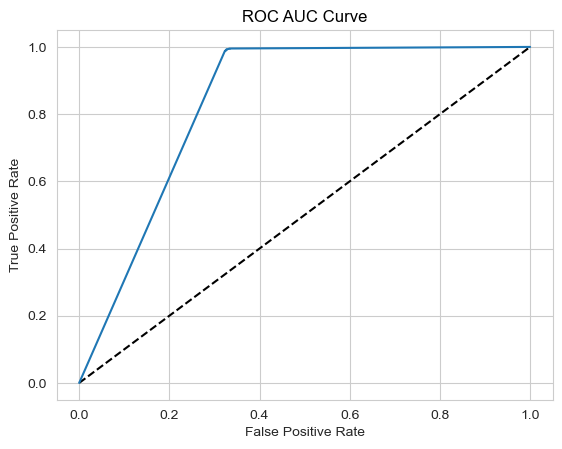

ROC AUC Score: 0.8349

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.98343628 0.98384809 0.98384735 0.98224581 0.98306946]

CV ROC AUC:
[0.81465949 0.83313785 0.82494241 0.81925698 0.81663633]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [295]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model_raw = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_raw)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.985458

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[  906   447]
 [  234 45244]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.79      0.67      0.73      1353
           1       0.99      0.99      0.99     45478

    accuracy                           0.99     46831
   macro avg       0.89      0.83      0.86     46831
weighted avg       0.98      0.99      0.98     46831


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



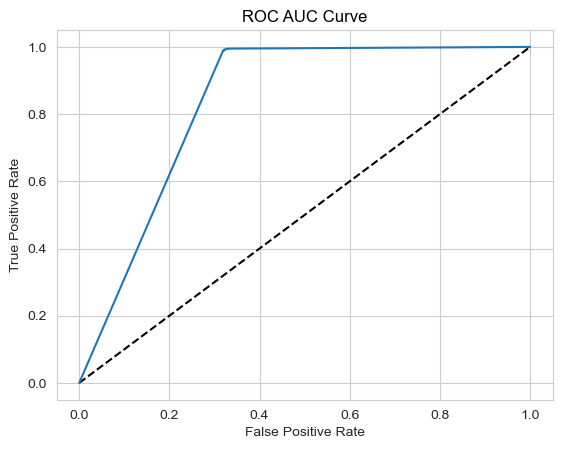

ROC AUC Score: 0.8369

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.98339053 0.98339053 0.98348128 0.98229157 0.98297794]

CV ROC AUC:
[0.8138699  0.83213184 0.82476694 0.81698085 0.81507036]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [296]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model_sc = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_sc)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.985223

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[  891   462]
 [  230 45248]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.79      0.66      0.72      1353
           1       0.99      0.99      0.99     45478

    accuracy                           0.99     46831
   macro avg       0.89      0.83      0.86     46831
weighted avg       0.98      0.99      0.98     46831


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



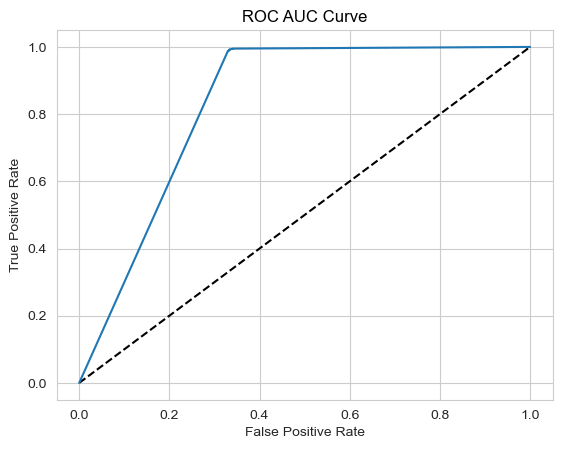

ROC AUC Score: 0.8314

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.98288721 0.98366507 0.98320674 0.98242885 0.98316098]

CV ROC AUC:
[0.8166709  0.83149374 0.81696006 0.81936509 0.81518027]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [297]:
#Set the X training and test datasets
vartrain = X_train_mm
vartest = X_test_mm

#Set the model properties
model_mm = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_mm)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.985437

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[  902   451]
 [  231 45247]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1353
           1       0.99      0.99      0.99     45478

    accuracy                           0.99     46831
   macro avg       0.89      0.83      0.86     46831
weighted avg       0.98      0.99      0.98     46831


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



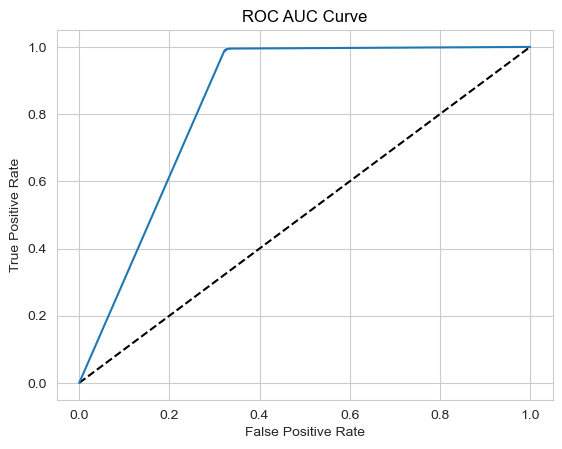

ROC AUC Score: 0.8355

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.98284146 0.9835278  0.98325249 0.98256612 0.9835728 ]

CV ROC AUC:
[0.80898941 0.83219344 0.82542142 0.82247581 0.81536894]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [298]:
#Set the X training and test datasets
vartrain = X_train_rb
vartest = X_test_rb

#Set the model properties
model_rb = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_rb)

XXXXXXXXXXXXXXXX ACCURACY SCORE XXXXXXXXXXXXXXXXXX
0.985437

XXXXXXXXXXXXXXXX CONFUSION MATRIX XXXXXXXXXXXXXXXX
[[  902   451]
 [  231 45247]]

XXXXXXXXXXXXXX CLASSIFICATION REPORT XXXXXXXXXXXXXX
              precision    recall  f1-score   support

           0       0.80      0.67      0.73      1353
           1       0.99      0.99      0.99     45478

    accuracy                           0.99     46831
   macro avg       0.89      0.83      0.86     46831
weighted avg       0.98      0.99      0.98     46831


XXXXXXXXXXXXXX ROC AUC SCORE AND CHART XXXXXXXXXXXXXXXXXX



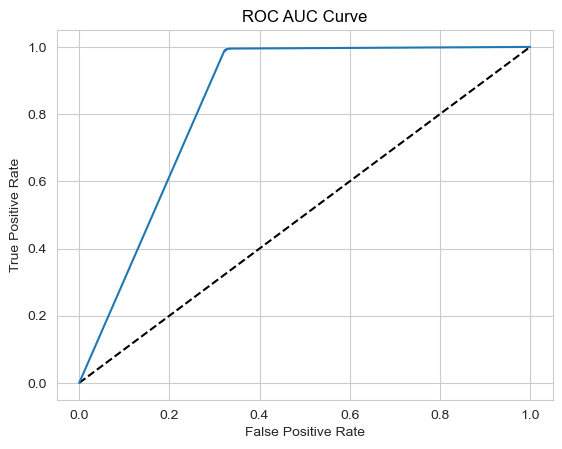

ROC AUC Score: 0.8355

XXXXXXXXXXXXXX CROSS VALIDATION XXXXXXXXXXXXXXXXXX

CV Accuracy Scores:
[0.98284146 0.9835278  0.98325249 0.98256612 0.9835728 ]

CV ROC AUC:
[0.80898941 0.83219344 0.82542142 0.82247581 0.81536894]

XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX


In [299]:
#Set the X training and test datasets
vartrain = X_train_rb
vartest = X_test_rb

#Set the model properties
model_rb = DecisionTreeClassifier(random_state = 21)

modeltraintest(vartrain, vartest, y_train, y_test, model_rb)

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done


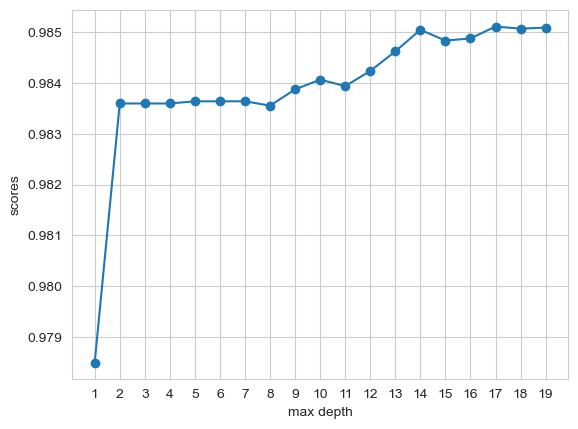

In [300]:
est = range(1,20)
scores = []
var_est = 'max depth'

vartrain = X_train_sc
vartest = X_test_sc

for d in est:
    classifier=DecisionTreeClassifier(max_depth = d, random_state = 21)
    classifier=classifier.fit(vartrain,y_train)
    scores.append(classifier.score(vartest, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()

In [301]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth=10, random_state = 21)

shorttraintest(vartrain, vartest, y_train, y_test, model)


Confusion Matrix:
[[  643   710]
 [   36 45442]]

Accuracy Score: 0.9841
Recall Score: 0.9992
Precision Score: 0.9846
ROC AUC Score: 0.9048



In [302]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth=10, random_state = 21)


#replaced vartest with vartrain and y_test with y_train
shorttraintest(vartrain, X_train, y_train, y_train, model)

Confusion Matrix:
[[     0   3183]
 [     0 106089]]

Accuracy Score: 0.9709
Recall Score: 1.0000
Precision Score: 0.9709
ROC AUC Score: 0.5000



iteration 30 done
iteration 31 done
iteration 32 done
iteration 33 done
iteration 34 done
iteration 35 done
iteration 36 done
iteration 37 done
iteration 38 done
iteration 39 done
iteration 40 done
iteration 41 done
iteration 42 done
iteration 43 done
iteration 44 done
iteration 45 done
iteration 46 done
iteration 47 done
iteration 48 done
iteration 49 done


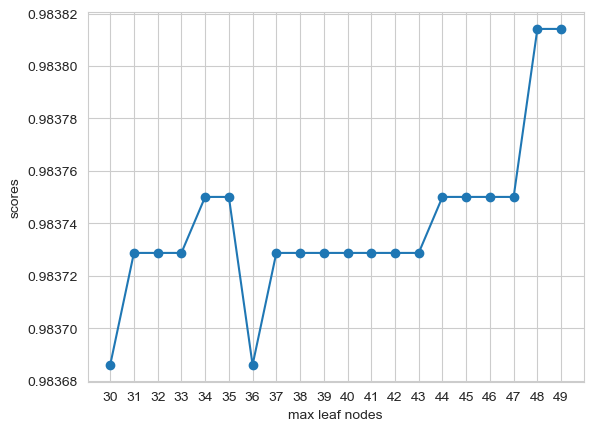

In [303]:
figsize=(20, 5)
est = range(30,50)
scores = []
var_est = 'max leaf nodes'

for d in est:
    classifier=DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = d, random_state = 21)
    classifier=classifier.fit(vartrain,y_train)
    scores.append(classifier.score(vartest, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()

iteration 42 done
iteration 43 done
iteration 44 done
iteration 45 done
iteration 46 done
iteration 47 done
iteration 48 done
iteration 49 done
iteration 50 done
iteration 51 done
iteration 52 done
iteration 53 done
iteration 54 done


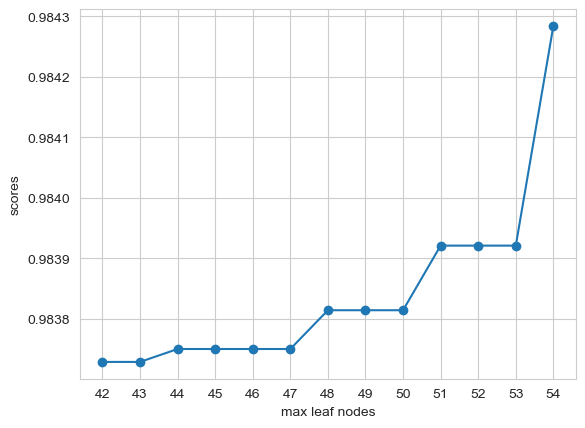

In [304]:
figsize=(20, 5)
est = range(42,55)
scores = []
var_est = 'max leaf nodes'

for d in est:
    classifier=DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = d, random_state = 21)
    classifier=classifier.fit(vartrain,y_train)
    scores.append(classifier.score(vartest, y_test))
    print("iteration {} done".format(d))


plt.plot(est, scores, '-o')
plt.xlabel(var_est)
plt.ylabel('scores')
plt.xticks(est)
plt.show()

In [305]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth =10, max_leaf_nodes = 53, class_weight=None, random_state = 21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[  623   730]
 [   23 45455]]

Accuracy Score: 0.9839
Recall Score: 0.9995
Precision Score: 0.9842
ROC AUC Score: 0.9000



In [306]:
vartrain = X_train_sc
vartest = X_test_sc
model = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 53, class_weight='balanced', random_state = 21)

shorttraintest(vartrain, vartest, y_train, y_test, model)

Confusion Matrix:
[[ 1097   256]
 [ 5685 39793]]

Accuracy Score: 0.8731
Recall Score: 0.8750
Precision Score: 0.9936
ROC AUC Score: 0.9252



In [307]:
cw = [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:100}]

vartrain = X_train_sc
vartest = X_test_sc

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    model = DecisionTreeClassifier(max_depth = 10, max_leaf_nodes = 53, class_weight=varcw, random_state = 21)
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

Confusion Matrix:
[[  623   730]
 [   23 45455]]

Accuracy Score: 0.9839
Recall Score: 0.9995
Precision Score: 0.9842
ROC AUC Score: 0.9000

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[ 1097   256]
 [ 5685 39793]]

Accuracy Score: 0.8731
Recall Score: 0.8750
Precision Score: 0.9936
ROC AUC Score: 0.9252

----------------------
Model with Class Weight: {0: 1, 1: 1.5}

Confusion Matrix:
[[  628   725]
 [   13 45465]]

Accuracy Score: 0.9842
Recall Score: 0.9997
Precision Score: 0.9843
ROC AUC Score: 0.9015

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[  614   739]
 [    1 45477]]

Accuracy Score: 0.9842
Recall Score: 1.0000
Precision Score: 0.9840
ROC AUC Score: 0.9040

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[  610   743]
 [    7 45471]]

Accuracy Score: 0.9840
Recall Score: 0.9998
Precision Score: 0.9839
ROC AUC Score: 0.9

In [308]:
from sklearn.model_selection import RandomizedSearchCV

vartrain = X_train_sc
vartest = X_test_sc

grid={"criterion": ['gini', 'entropy'], "max_depth" : [8,10,12,13,14],
      "max_leaf_nodes" : [50,52,54,56,58],
      "class_weight": [None, 'balanced', {0:1, 1:1.5}, {0:1, 1:2}, {0:1, 1:3}]}
model_random = DecisionTreeClassifier(random_state = 21)
model_cv=RandomizedSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)

print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

tuned hyperparameters :(best parameters)  {'max_leaf_nodes': 58, 'max_depth': 13, 'criterion': 'entropy', 'class_weight': {0: 1, 1: 2}}
accuracy : 0.9841862482194758


from sklearn.model_selection import GridSearchCV


grid={"criterion": ['gini', 'entropy'], "max_depth" : [11,12,13,14,15],
      "max_leaf_nodes" : [50,52,54,56,58],
      "class_weight": [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}]}
model_random = DecisionTreeClassifier(random_state = 21)
model_cv=GridSearchCV(model_random,grid,cv=5)
model_cv.fit(vartrain,y_train)


print("tuned hyperparameters :(best parameters) ",model_cv.best_params_)
print("accuracy :",model_cv.best_score_)

Confusion Matrix:
[[  620   733]
 [   26 45452]]

Accuracy Score: 0.9838
Recall Score: 0.9994
Precision Score: 0.9841


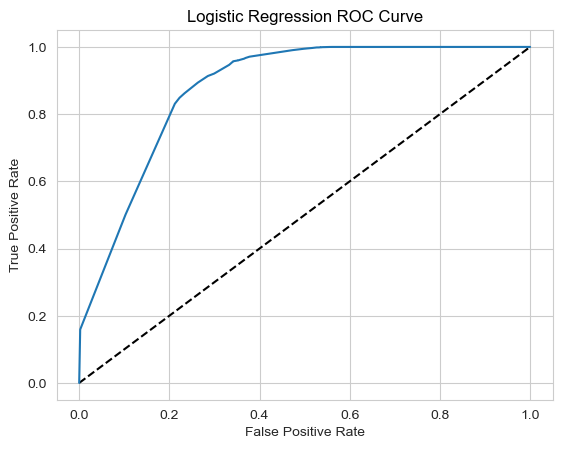

In [309]:
#Set the X training and test datasets
vartrain = X_train_sc
vartest = X_test_sc

#Set the model properties
model_dt = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 52, 
                               class_weight=None, criterion = 'gini', random_state = 21)

#Assess with the model
model_dt.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt.predict(vartest)
model_prob = model_dt.predict_proba(vartest)


print('Confusion Matrix:')
cm_dt = confusion_matrix(y_test, model_pred)
print(cm_dt)
print("")

#Assess with the model
score = model_dt.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt.predict_proba(vartest)[:,1]

dt_fpr, dt_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_fpr, dt_tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [310]:
cw = [None, 'balanced', {0:1, 1:2}, {0:1, 1:3}, {0:1, 1:5}, {0:1, 1:10}, {0:1, 1:50}, {0:1, 1:100}]

vartrain = X_train
vartest = X_test

for w in cw:
    print('----------------------')
    vartitle = "Model with Class Weight: " + str(w) 
    varcw = w
    #Set the model properties
    model = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 52, 
                               class_weight=varcw, criterion = 'gini', random_state = 21)#Assess with the model
    print(vartitle)
    print('')
    shorttraintest(vartrain, vartest, y_train, y_test, model)


          
print('----------------------')

----------------------
Model with Class Weight: None

Confusion Matrix:
[[  620   733]
 [   26 45452]]

Accuracy Score: 0.9838
Recall Score: 0.9994
Precision Score: 0.9841
ROC AUC Score: 0.8777

----------------------
Model with Class Weight: balanced

Confusion Matrix:
[[ 1105   248]
 [ 5406 40072]]

Accuracy Score: 0.8793
Recall Score: 0.8811
Precision Score: 0.9938
ROC AUC Score: 0.9326

----------------------
Model with Class Weight: {0: 1, 1: 2}

Confusion Matrix:
[[  597   756]
 [    6 45472]]

Accuracy Score: 0.9837
Recall Score: 0.9999
Precision Score: 0.9836
ROC AUC Score: 0.8686

----------------------
Model with Class Weight: {0: 1, 1: 3}

Confusion Matrix:
[[  597   756]
 [    5 45473]]

Accuracy Score: 0.9838
Recall Score: 0.9999
Precision Score: 0.9836
ROC AUC Score: 0.8565

----------------------
Model with Class Weight: {0: 1, 1: 5}

Confusion Matrix:
[[  593   760]
 [    3 45475]]

Accuracy Score: 0.9837
Recall Score: 0.9999
Precision Score: 0.9836
ROC AUC Score: 0.858

Confusion Matrix:
[[ 1105   248]
 [ 5406 40072]]

Accuracy Score: 0.8793
Recall Score: 0.8811
Precision Score: 0.9938


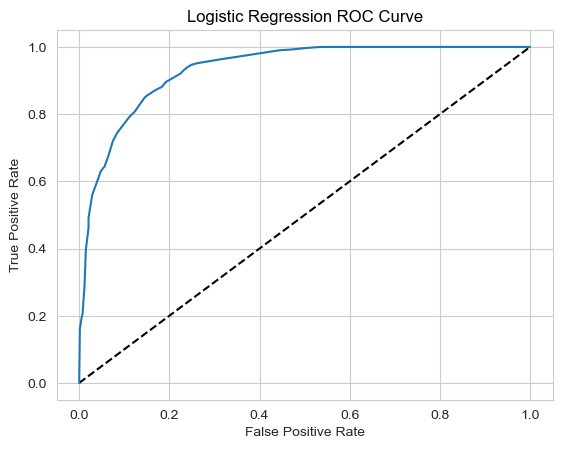

In [331]:
#Set the X training and test datasets
vartrain = X_train
vartest = X_test

#Set the model properties
model_dt_2 = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 52, 
                               class_weight='balanced', criterion = 'gini', random_state = 21)

#Assess with the model
model_dt_2.fit(vartrain, y_train)

#Predict with the model
model_pred = model_dt_2.predict(vartest)
model_prob = model_dt_2.predict_proba(vartest)


print('Confusion Matrix:')
cm_dt_2 = confusion_matrix(y_test, model_pred)
print(cm_dt_2)
print("")

#Assess with the model
score = model_dt_2.score(vartest, y_test)
score_format = 'Accuracy Score: {0:.4f}'.format(score)
print(score_format)

recall = recall_score(y_test, model_pred)
recall_format = 'Recall Score: {0:.4f}'.format(recall)
print(recall_format)

precision = precision_score(y_test, model_pred)
precision_format = 'Precision Score: {0:.4f}'.format(precision)
print(precision_format)

y_pred_prob = model_dt_2.predict_proba(vartest)[:,1]

dt_2_fpr, dt_2_tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(dt_2_fpr, dt_2_tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [332]:
from sklearn import tree
X_names = X_train.columns.values.tolist()
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(50, 35), dpi=300)

plot_tree(model, 
          filled=True, 
          rounded=True,
          fontsize=15,
          proportion=True,
          class_names=["Malicious", "Benign"], 
          feature_names=X_names);

[Text(0, 0.5, 'Malicious'), Text(0, 1.5, 'Benign')]

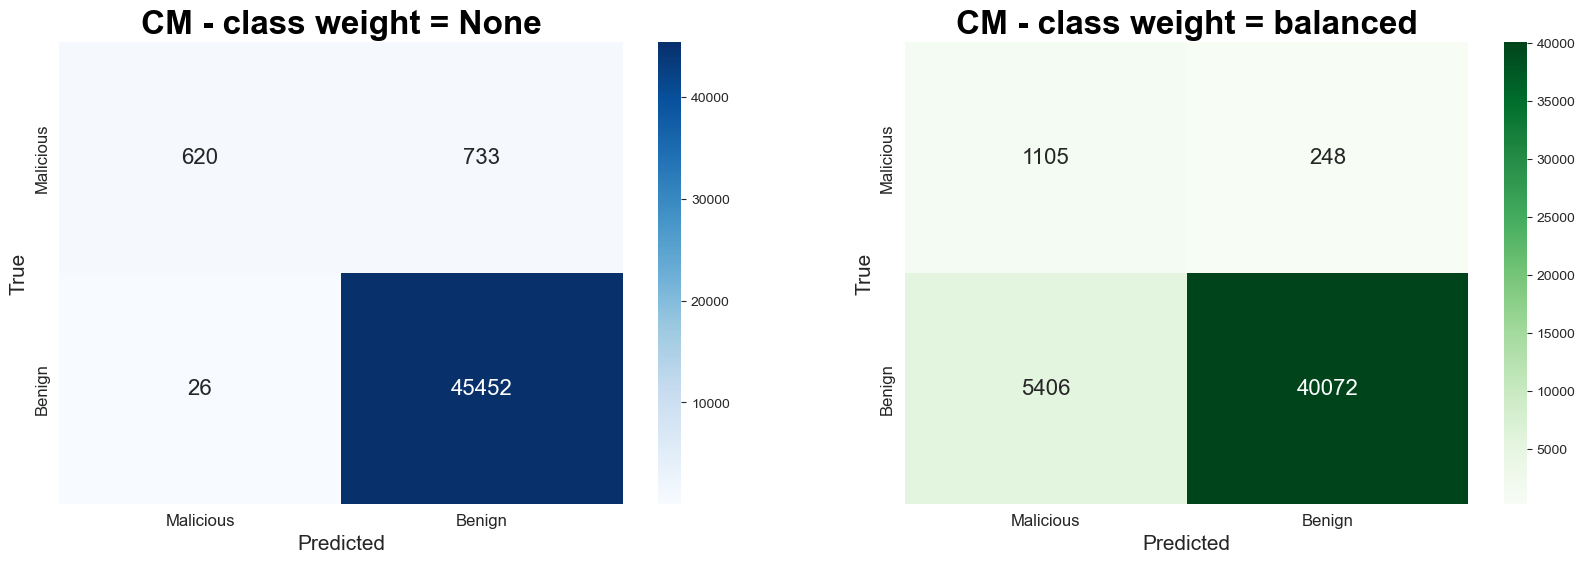

In [337]:
plt.figure(figsize=(20,6))


plt.subplot(121)


plt.title('CM - class weight = None', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt, annot=True, cmap="Blues", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Malicious', 'Benign'], fontsize=12)
chart.yaxis.set_ticklabels(['Malicious', 'Benign'], fontsize=12, va='center')


plt.subplot(122)
plt.title('CM - class weight = balanced', fontweight='bold', color = 'black', fontsize='24', horizontalalignment='center')
chart = sns.heatmap(cm_dt_2, annot=True, cmap="Greens", annot_kws={"size": 16}, fmt="g")
chart.set_xlabel('Predicted', fontsize=15)
chart.set_ylabel('True', fontsize=15)
chart.xaxis.set_ticklabels(['Malicious', 'Benign'], fontsize=12)
chart.yaxis.set_ticklabels(['Malicious', 'Benign'], fontsize=12, va='center')

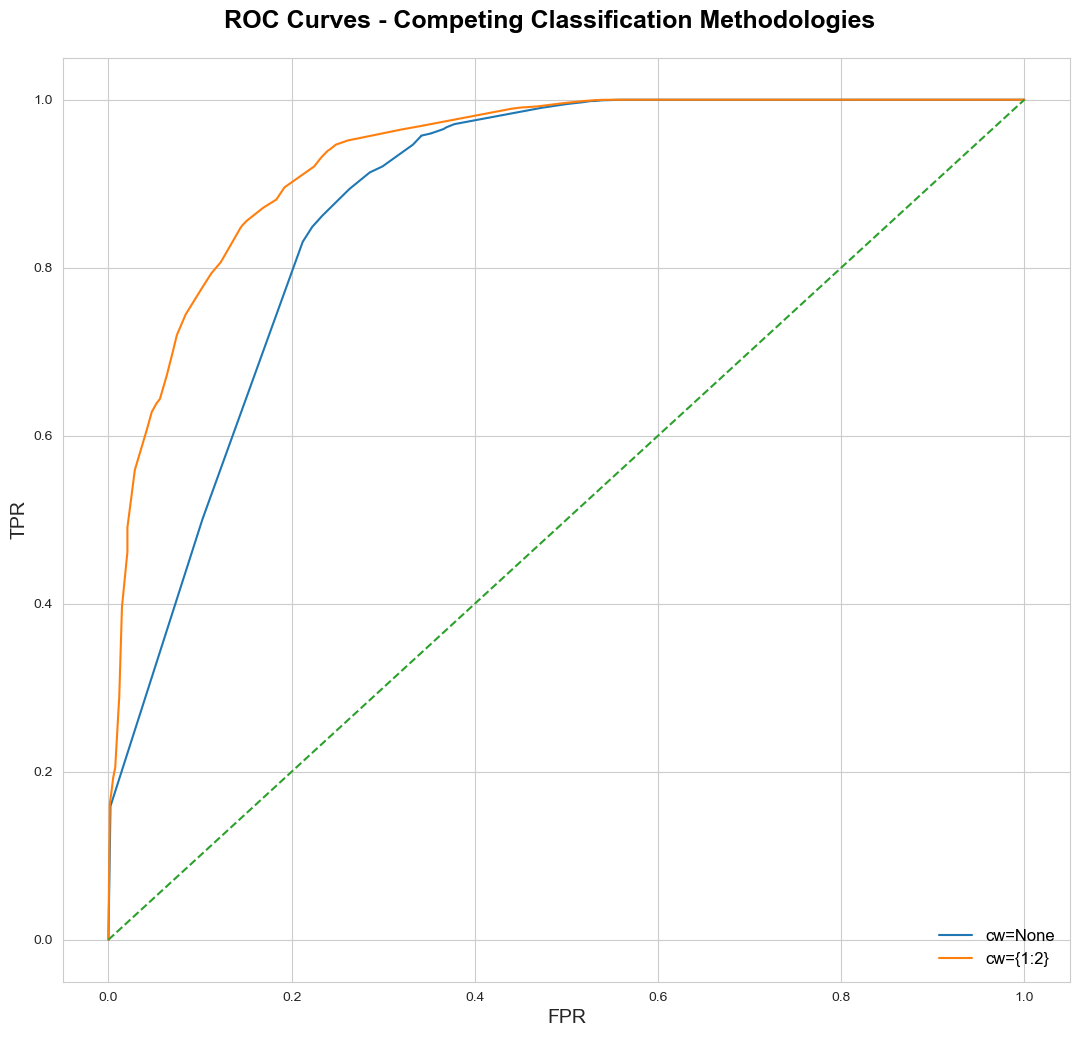

In [334]:
# Create Overall ROC Curve 
plt.figure(figsize = (13,12))
plt.suptitle('ROC Curves - Competing Classification Methodologies', fontweight='bold', fontsize=18, y=.92)
plt.plot(dt_fpr, dt_tpr, label='cw=None')
plt.plot(dt_2_fpr, dt_2_tpr, label='cw={1:2}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR', fontsize=14)
plt.ylabel('TPR', fontsize=14)
plt.legend(loc="lower right", frameon=False, fontsize=12)
plt.show()

In [338]:
X_names = pd.DataFrame(list(X.columns))
df_fi = pd.DataFrame(model_dt.feature_importances_)
df_fi_2 = pd.DataFrame(model_dt_2.feature_importances_)
df_feat_imp = pd.concat([X_names, df_fi, df_fi_2], axis = 1)
df_feat_imp.columns = ['Features', 'dt_importance', 'dt_2_importance']
df_feat_imp

Features  dt_importance  dt_2_importance
0  id.resp_h  0.123833       0.560834       
1  id.resp_p  0.550549       0.252829       
2  service    0.002522       0.000000       
3  proto      0.323097       0.186337

In [339]:
df_feat_imp[(df_feat_imp['dt_2_importance']!=0) | (df_feat_imp['dt_importance']!=0)].sort_values('dt_2_importance', ascending = False)

Features  dt_importance  dt_2_importance
0  id.resp_h  0.123833       0.560834       
1  id.resp_p  0.550549       0.252829       
3  proto      0.323097       0.186337       
2  service    0.002522       0.000000